# Derivation of equation of motion

In [38]:
import sympy as sp
import numpy as np
import control as ct
from IPython.display import display, Latex, Math, Image
def generate_matrix(vector, factors):
    return sp.Matrix([[sp.collect(sp.expand(vector[j]), factors).coeff(x) 
                 for x in factors] for j in range(len(vector))])


def eq_disp(varstring, expr):
    display(Latex(f"${varstring}={sp.latex(expr)}$"))

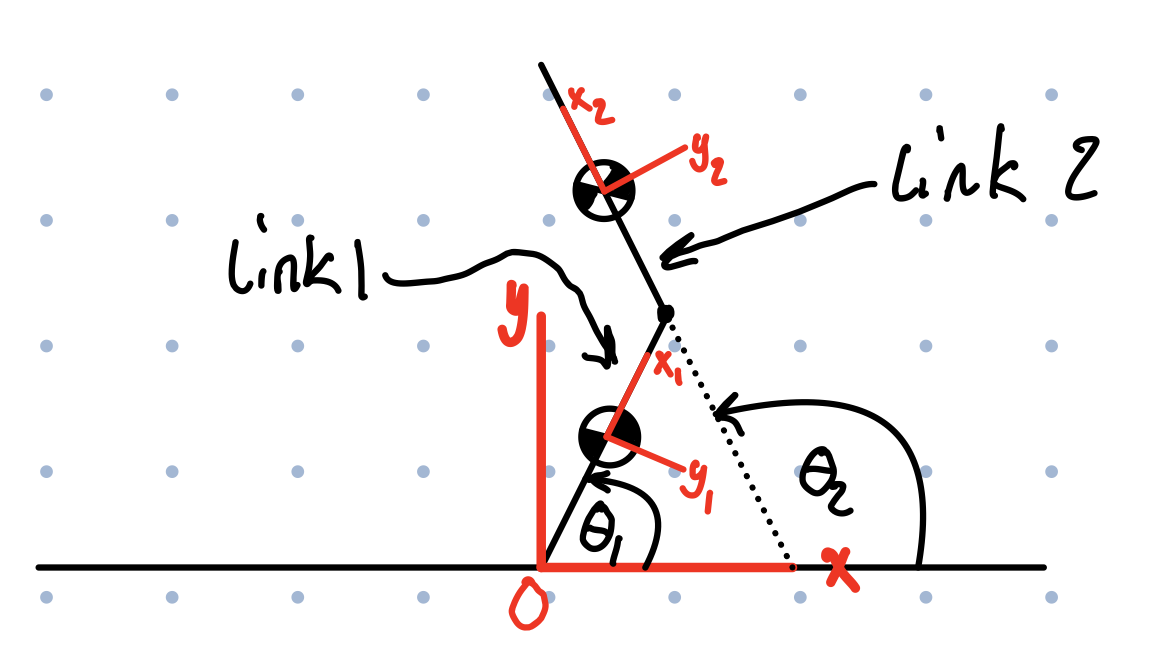

In [39]:
Image("FBD.png")

In [40]:
s, g, t, m1, m2, J1, J2, c1, c2, l1, l2 = sp.symbols(r"s, g, t, m1, m2, J_1, J_2 c_1, c_2, l_1, l_2")
s = sp.symbols('s')
theta1 = sp.Function('theta_1')(t)
theta2 = sp.Function('theta_2')(t)
tau1 = sp.Function('tau_1')(t)
tau2 = sp.Function('tau_2')(t)

dtheta1 = theta1.diff(t)
dtheta2 = theta2.diff(t)
ddtheta1 = dtheta1.diff(t)
ddtheta2 = dtheta2.diff(t)
q = sp.Matrix([theta1, theta2])
dq = q.diff(t)
def A(theta):
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta)], 
        [sp.sin(theta), sp.cos(theta)]])
L1 = sp.Matrix([l1, 0])
L2 = sp.Matrix([l2, 0])
""" J1 = sp.Rational(1,12)*m1*l1**2
J2 = sp.Rational(1,12)*m2*l2**2 """

' J1 = sp.Rational(1,12)*m1*l1**2\nJ2 = sp.Rational(1,12)*m2*l2**2 '

Physical properties

In [41]:
m1v = 0.269
m2v = 0.511
L1v = 0.307
L2v = 0.307
J1v = 1/12*m1v*L1v**2
J2v = 1/12*m2v*L2v**2
c1v = 0.1
c2v = 0.1
properties = {
    m1: m1v,
    m2: m2v,
    l1: L1v,
    l2: L2v,
    J1: J1v,
    J2: J2v,
    c1: c1v,
    c2: c2v,
    g: 9.82
}

define x and y of the centroid of the two bodies

In [42]:
x1, y1= A(theta1)*sp.Rational(1,2)*L1 
x2, y2 = A(theta1)*L1 + A(theta2)*sp.Rational(1,2)*L2

In [78]:
y2

l_1*sin(theta_1(t)) + l_2*sin(theta_2(t))/2

In [43]:
T_rot = sp.Rational(1,2)*(J1*dtheta1**2 + J2*dtheta2**2)
T_trans = sp.Rational(1,2)*(m1*(x1.diff(t)**2 + y1.diff(t)**2) + m2*(x2.diff(t)**2 + y2.diff(t)**2))
T = T_rot + T_trans
R = sp.Rational(1,2)*(c1*dtheta1**2 + c2*dtheta2**2)  # friction as function of rotational velocity
U = m1*g*y1 + m2*g*y2
L = T-U
eq1, eq2 = L.diff(dq).diff(t) - L.diff(q) + R.diff(dq)

In [71]:
eq1

J_1*Derivative(theta_1(t), (t, 2)) + c_1*Derivative(theta_1(t), t) + g*l_1*m1*cos(theta_1(t))/2 + g*l_1*m2*cos(theta_1(t)) + m1*(l_1**2*sin(theta_1(t))**2*Derivative(theta_1(t), (t, 2))/2 + l_1**2*cos(theta_1(t))**2*Derivative(theta_1(t), (t, 2))/2)/2 - m2*(-2*l_1*(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*sin(theta_2(t))*Derivative(theta_2(t), t)/2)*cos(theta_1(t))*Derivative(theta_1(t), t) - 2*l_1*(l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*cos(theta_2(t))*Derivative(theta_2(t), t)/2)*sin(theta_1(t))*Derivative(theta_1(t), t))/2 + m2*(-2*l_1*(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*sin(theta_2(t))*Derivative(theta_2(t), t)/2)*cos(theta_1(t))*Derivative(theta_1(t), t) - 2*l_1*(l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*cos(theta_2(t))*Derivative(theta_2(t), t)/2)*sin(theta_1(t))*Derivative(theta_1(t), t) + 2*l_1*(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t)**2 + l_1*cos(theta_1(t))*Derivative(theta_1(t), (t, 2)) - l_2*sin(theta_2(t))*Derivat

In [79]:
sys = sp.Matrix([eq1, eq2])
generate_matrix(sys, )
sp.Matrix([[sp.collect(sp.expand(vector[j]), factors).coeff(x) 
                 for x in factors] for j in range(len(factors))])

IndexError: index out of range

## Find the state space representation

solve for $[\ddot{\theta_1}, \ddot{\theta_2}]$ from the lagrange equations

In [44]:
sol = sp.solve([eq1, eq2], (ddtheta1, ddtheta2), simplify=True)

In [45]:
ddq = sp.Matrix([sol[ddtheta1], sol[ddtheta2]])
ddq

Matrix([
[                                                                                                         (-16*J_2*c_1*Derivative(theta_1(t), t) - 8*J_2*g*l_1*m1*cos(theta_1(t)) - 16*J_2*g*l_1*m2*cos(theta_1(t)) - 8*J_2*l_1*l_2*m2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 - 4*c_1*l_2**2*m2*Derivative(theta_1(t), t) + 8*c_2*l_1*l_2*m2*cos(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t) - 2*g*l_1*l_2**2*m1*m2*cos(theta_1(t)) + 2*g*l_1*l_2**2*m2**2*cos(theta_1(t) - 2*theta_2(t)) - 2*g*l_1*l_2**2*m2**2*cos(theta_1(t)) - 2*l_1**2*l_2**2*m2**2*sin(2*theta_1(t) - 2*theta_2(t))*Derivative(theta_1(t), t)**2 - 2*l_1*l_2**3*m2**2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2 - 2*l_1**2*l_2**2*m2**2*cos(2*theta_1(t) - 2*theta_2(t)) + 2*l_1**2*l_2**2*m2**2)],
[(-16*J_1*c_2*Derivative(theta_2(t), t) - 8*J_1*g*l_2*m2*cos(theta_2(t)) + 8*J_1*l_1*l_2*m2*sin(theta_1(t) - thet

Our state variables are:
$$z =[z_1, z_2, z_3, z_4]=[\theta_1, \theta_2, \dot{\theta_1}, \dot{\theta_2}]$$
our inputs are:
$$u = [\tau_1, \tau_2]$$
Now we can define the system of differential equations $\dot{z}$

In [46]:
z1, z2, z3, z4 = sp.symbols("z_1, z_2, z_3, z_4", cls=sp.Function)
z1=z1(t); z2=z2(t); z3=z3(t); z4=z4(t)
z = sp.Matrix([z1, z2, z3, z4])
state_space = {
    theta1: z1,
    theta2: z2,
    dtheta1: z3,
    dtheta2: z4
}
C = sp.Matrix([
    [0, 0],
    [0, 0],
    [1/J1, 0],
    [0, 1/J2]
])
u = sp.Matrix([tau1, tau2])
dz = sp.Matrix([z[2], z[3], ddq[0].subs(state_space), ddq[1].subs(state_space)]) +C@u
dz

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   z_3(t)],
[                                                                                                                                                                                                                                                                                                                                 

Now the jacobian with regards to the state variables is

In [47]:
Jstate = dz.jacobian(z)
Jstate

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

The jacobian with regards to the inputs is

In [48]:
Jinput = dz.jacobian(u)
Jinput

Matrix([
[    0,     0],
[    0,     0],
[1/J_1,     0],
[    0, 1/J_2]])

## Finding equilibrium point to linearlize about.
The equilibrium position $(\theta_1, \theta_2)$ can be chosen abitrarily to let us calculate the necessary constant motor torque to maintain this position.
The relationship between torque and the angle is given by:

In [49]:
def u_at_z0(tet1, tet2):
    at_rest = {
        z1: tet1, 
        z2: tet2, 
        z3: 0, 
        z4: 0, }
    eqlb_p = sp.solve(dz.subs(at_rest), {tau1, tau2})
    tau0 = sp.Matrix([eqlb_p[tau1], eqlb_p[tau2]])
    return tau0

At the point of expansion $\dot{z}=0$ by defintion since we chose a steady state as the operating point.  
Also if we redefine to measure $(\theta_1, \theta_2)$ from the operating point we get 
$$z_0=[0,0,0,0]$$
in which case we can simplify $(z-z_0)=z$.

In [50]:
z0 = sp.Matrix([0, 0, 0, 0])
u0 = u_at_z0(z0[0], z0[1])
lin_dz = Jstate.subs(zip(z, z0))@(z) + Jinput.subs(zip(u, u0))@(u)
lin_dz

Matrix([
[                                                                                                                                                                                                                                                                                z_3(t)],
[                                                                                                                                                                                                                                                                                z_4(t)],
[                   8*c_2*l_1*l_2*m2*z_4(t)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2) + (-16*J_2*c_1 - 4*c_1*l_2**2*m2)*z_3(t)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2) + tau_1(t)/J_1],
[8*c_1*l_1*l_2*m2*z_3(t)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2) + (-16*J_1*c_2 - 4*c_2*l_1**2*

In [51]:
def LPT(x):
    return sp.laplace_transform(x, t, s)

In [52]:
ics = {
    theta1.subs(t, 0): 0,
    theta2.subs(t, 0): 0,
    dtheta1.subs(t,0): 0,
    dtheta2.subs(t,0): 0,
    ddtheta1.subs(t,0): 0,
    ddtheta2.subs(t,0): 0
}
inv_state_space = {v: k for k,v in state_space.items()}
variables = sp.Matrix([theta1, theta2, tau1, tau2])
s_variables = [x.subs(t, s) for x in variables]
L_variables = [sp.laplace_transform(x, t, s) for x in [theta1, theta2, tau1, tau2]]
Y = (
    Jstate.subs(zip(z, z0))@LPT(z.subs(inv_state_space)) 
    - LPT(z.diff(t).subs(inv_state_space)) 
    + Jinput.subs(zip(u, u0))@LPT(u)).subs(ics)
Y

C:\Users\osteb\AppData\Local\Temp\ipykernel_18976\1244304805.py:2: SymPyDeprecationWarning: 

Calling laplace_transform() on a Matrix with noconds=False (the default) is
deprecated. Either noconds=True or use legacy_matrix=False to get the new
behavior.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-laplace-transform-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return sp.laplace_transform(x, t, s)
C:\Users\osteb\AppData\Local\Temp\ipykernel_18976\1244304805.py:2: SymPyDeprecationWarning: 

Calling laplace_transform() on a Matrix with noconds=False (the default) is
deprecated. Either noconds=True or use legacy_matrix=False to get the new
behavior.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-laplace-transform-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return 

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                   0],
[                                                                                                                                                                                                                                                                                                                                                                                                                   0],
[                   8*c_2*l_1*l_2*m2*s*LaplaceTransform(theta_2(t), t, s)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2) - s**2*Lapl

In [53]:
Y = Y.subs(zip(L_variables, s_variables))
Y

Matrix([
[                                                                                                                                                                                                                                                                                                                   0],
[                                                                                                                                                                                                                                                                                                                   0],
[                   8*c_2*l_1*l_2*m2*s*theta_2(s)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2) - s**2*theta_1(s) + s*(-16*J_2*c_1 - 4*c_1*l_2**2*m2)*theta_1(s)/(16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2) + tau_1(s)/J_1],
[8*c_1*l_1*l_2*m2*s*theta_1(s)/(16*J_1*J_2 + 4*J_1*l_2*

In [54]:
theta1_s, theta2_s, tau1_s, tau2_s = s_variables

In [55]:
sol = sp.solve(Y, (tau1_s, tau2_s), simplify=True)
for k,v in sol.items():
    eq_disp("\\"+k.__repr__(), v.subs(properties))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The equations for $\theta_1(s)$ and $\theta_2(s)$ are coupled. To simplify we treat the contribution from the other variable as a disturbance

In [56]:
def remove_term(expr, term):
    new_expr = expr.subs(term, 0)
    return new_expr

tau1 = remove_term(sol[tau1_s], theta2_s)
tau2 = remove_term(sol[tau2_s], theta1_s)
eq_disp(r"\theta_1(s)", theta1)
eq_disp(r"\theta_2(s)", theta2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can then find the transfer functions for the dynamics

In [57]:
T1s = ((tau1/theta1_s)**-1).simplify()
T2s = ((tau2/theta2_s)**-1).simplify()
eq_disp(r"\frac{\theta_1(s)}{\tau_1(s)}", T1s)
eq_disp(r"\frac{\theta_2(s)}{\tau_2(s)}", T2s)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [68]:
sp.python(T1s)

"J_1 = Symbol('J_1')\nJ_2 = Symbol('J_2')\nl_2 = Symbol('l_2')\nm2 = Symbol('m2')\nl_1 = Symbol('l_1')\nm1 = Symbol('m1')\ns = Symbol('s')\nc_1 = Symbol('c_1')\ne = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_1*s*(16*J_1*J_2*s + 4*J_1*l_2**2*m2*s + 16*J_2*c_1 + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_1*l_2**2*m2 + l_1**2*l_2**2*m1*m2*s))"

In [59]:
sp.python(T2s)

"J_1 = Symbol('J_1')\nJ_2 = Symbol('J_2')\nl_2 = Symbol('l_2')\nm2 = Symbol('m2')\nl_1 = Symbol('l_1')\nm1 = Symbol('m1')\ns = Symbol('s')\nc_2 = Symbol('c_2')\ne = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_2*s*(16*J_1*J_2*s + 16*J_1*c_2 + 4*J_1*l_2**2*m2*s + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_2*l_1**2*m1 + 16*c_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2*s))"

In [60]:
T1s.subs(properties)

2.49125497003222/(s*(0.00526339499344853*s + 0.0256859941333333))

In [61]:
T2s.subs(properties)

1.31144341866667/(s*(0.00526339499344853*s + 0.0905795722666667))

## Numeric modelling
Now we have our linearized state space model, which we can model numerically

In [62]:
sp.Poly(T1s.subs(properties))

Poly(2.49125497003222*(1/(0.00526339499344853*s**2 + 0.0256859941333333*s)), 1/(0.00526339499344853*s**2 + 0.0256859941333333*s), domain='RR')

In [63]:
num = float(T1s.subs(properties).as_numer_denom()[0])
denom = [float(x) for x in sp.Poly(T1s.subs(properties).as_numer_denom()[1]).all_coeffs()]
display(num, denom)

2.4912549700322186

[0.005263394993448534, 0.025685994133333334, 0.0]

In [64]:
T1 = ct.tf(num, denom)

In [65]:
T1

TransferFunction(array([2.49125497]), array([0.00526339, 0.02568599, 0.        ]))

In [66]:
num = float(T2s.subs(properties).as_numer_denom()[0])
denom = [float(x) for x in sp.Poly(T2s.subs(properties).as_numer_denom()[1]).all_coeffs()]
display(num, denom)

1.3114434186666668

[0.005263394993448534, 0.09057957226666667, 0.0]

In [67]:
T2 = ct.tf(num, denom)
T2

TransferFunction(array([1.31144342]), array([0.00526339, 0.09057957, 0.        ]))

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from IPython.display import display, Latex, Math, Image
from scipy import interpolate
from scipy.optimize import least_squares, minimize, brute

# Function for displaying expressions
def eq_disp(varstring, expr, unit=""):
    display(Latex(f"${varstring}={sp.latex(expr)} \: {unit}$"))

# Parameters of the dynamic system

In [2]:
# Plant parameters
m1 = 0.269
m2 = 0.511
l_1 = 0.307
l_2 = 0.307
J_1 = 1/12*m1*l_1**2
J_2 = 1/12*m2*l_2**2
g = 9.82
s = ct.tf('s')

# Initialize simulations with guessed c_1 and c_2

Simulate $\theta_1$

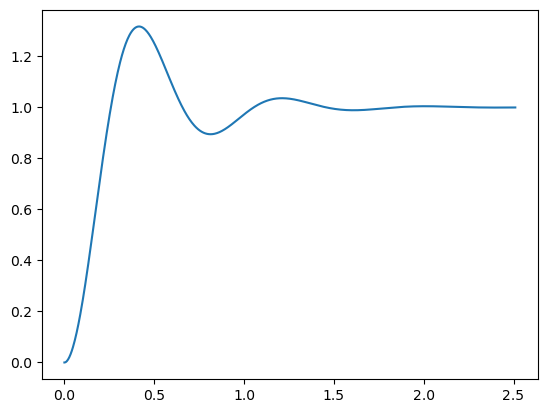

In [3]:
# Guess c_1
c_1 = 0.15

# Plant transfer functions
G1 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_1*s*(16*J_1*J_2*s + 4*J_1*l_2**2*m2*s + 16*J_2*c_1 + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_1*l_2**2*m2 + l_1**2*l_2**2*m1*m2*s))

# Time delay [s]
T_delay1 = 0.1

# Make padé approximation of time delay
n_pade1 = 4
num_pade1, den_pade1 = ct.pade(T_delay1, n_pade1)
H_pade1 = ct.tf(num_pade1, den_pade1)

# Conversion factor from the input given to the torque
input_to_torque1 = 1/40

# Input PD-values
input_Kp1 = 5
input_Kd1 = 0.35

# Converted PD-values
Kp1 = input_Kp1*input_to_torque1
Kd1 = input_Kd1*input_to_torque1

# System definition
T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)

# Plot
t1_sim, y1_sim = ct.step_response(T1)
plt.plot(t1_sim, y1_sim)

Simulate $\theta_2$

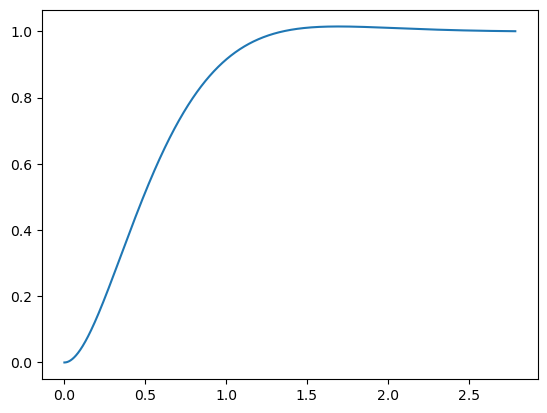

In [4]:
# Guess c_2
c_2 = 0.03

# Plant transfer function
G2 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_2*s*(16*J_1*J_2*s + 16*J_1*c_2 + 4*J_1*l_2**2*m2*s + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_2*l_1**2*m1 + 16*c_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2*s))

# Time delay [s]
T_delay2 = 0.1

# Make padé approximation of time delay
n_pade2 = 4
num_pade2, den_pade2 = ct.pade(T_delay2, n_pade2)
H_pade2 = ct.tf(num_pade2, den_pade2)

# Conversion factor from the input given to the torque
input_to_torque2 = 1/40

# Input PD-values
input_Kp2 = 1.5
input_Kd2 = 0.1

# Converted PD-values
Kp2 = input_Kp2*input_to_torque2
Kd2 = input_Kd2*input_to_torque2

# System definition
T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)

# Plot
t2_sim, y2_sim = ct.step_response(T2)
plt.plot(t2_sim, y2_sim)

# Finding c_1

Raw measurement data

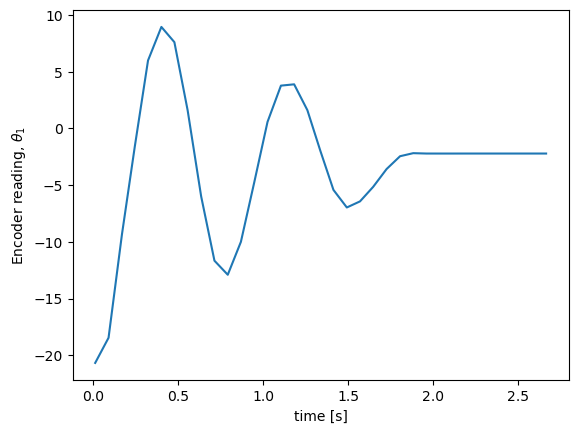

In [5]:
t1_real_raw = np.loadtxt('data/theta1_kp5_kd0.35')[0]
yout1_real_raw = np.loadtxt('data/theta1_kp5_kd0.35')[1]

plt.plot(t1_real_raw, yout1_real_raw)
plt.xlabel('time [s]')
plt.ylabel('Encoder reading, $\\theta_1$')
plt.savefig("plots/theta1_raw.png", dpi=150,bbox_inches='tight')

Get correct values by subtracting the minimum og the data and normalizing

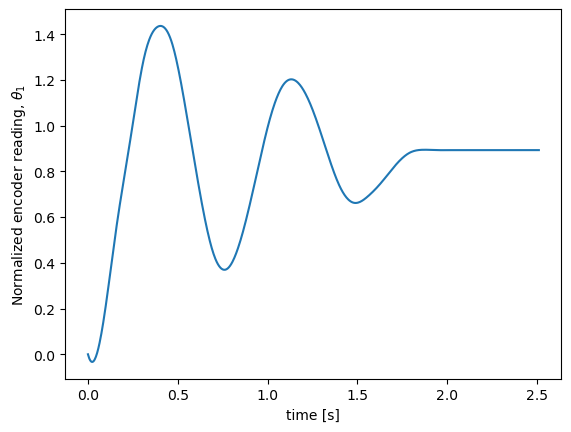

In [6]:
def load_and_clean(datapath, t_sim, y_sim):
    # Load data
    t_real_raw = np.loadtxt(datapath)[0]
    yout_real_raw = np.loadtxt(datapath)[1]
    
    # Normalize
    t_real =  t_real_raw - np.min(t_real_raw)
    yout_real = -(yout_real_raw - np.min(yout_real_raw))/np.min(yout_real_raw)
    
    # Interpolate to same data points as simulation
    tck = interpolate.splrep(t_real, yout_real, s=0)
    ynew = interpolate.splev(t_sim, tck, der=0)
    
    return t_sim, ynew

t1_real, y1_real = load_and_clean('data/theta1_kp5_kd0.35', t1_sim, y1_sim)
plt.plot(t1_real, y1_real)
plt.xlabel('time [s]')
plt.ylabel('Normalized encoder reading, $\\theta_1$')
plt.savefig("plots/theta1_clean.png", dpi=150,bbox_inches='tight')

In [7]:
# Define function to minimize
def y1_difference(c_1):

    # Plant transfer functions
    #G1 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(s*(16*J_1*J_2*s + 4*J_1*l_2**2*m2*s + 16*J_2*c_1 + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_1*l_2**2*m2 + l_1**2*l_2**2*m1*m2*s))
    G1 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_1*s*(16*J_1*J_2*s + 4*J_1*l_2**2*m2*s + 16*J_2*c_1 + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_1*l_2**2*m2 + l_1**2*l_2**2*m1*m2*s))

    # Input PD-values
    input_Kp1 = 5
    input_Kd1 = 0.35

    # Converted PD-values
    Kp1 = input_Kp1*input_to_torque1
    Kd1 = input_Kd1*input_to_torque1

    # System definition
    T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)
    
    # Get simulated ste response
    t1_sim, y1_sim = ct.step_response(T1)
    
    # Get real step response
    t1_real, y1_real = load_and_clean('data/theta1_kp5_kd0.35', t1_sim, y1_sim)
    
    return np.sum((y1_real - y1_sim)**2)

c_1 = minimize(y1_difference, 0.15, bounds=[(0, 0.2)]).x[0]
c_1

0.08802001892969626

Show simulated response

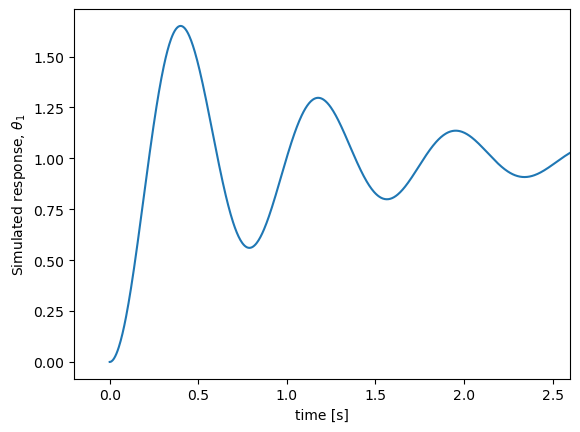

In [8]:
# Plant transfer functions
G1 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_1*s*(16*J_1*J_2*s + 4*J_1*l_2**2*m2*s + 16*J_2*c_1 + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_1*l_2**2*m2 + l_1**2*l_2**2*m1*m2*s))

# Input PD-values
input_Kp1 = 5
input_Kd1 = 0.35

# Converted PD-values
Kp1 = input_Kp1*input_to_torque1
Kd1 = input_Kd1*input_to_torque1

# System definition
T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)

# Plot
t1_sim, y1_sim = ct.step_response(T1)
plt.plot(t1_sim, y1_sim)
plt.xlim(-0.2, 2.6)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_sim.png", dpi=150,bbox_inches='tight')

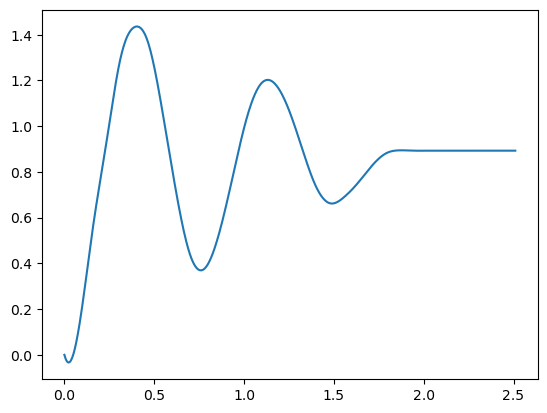

In [9]:
plt.plot(t1_real, y1_real)

# Finding c_2

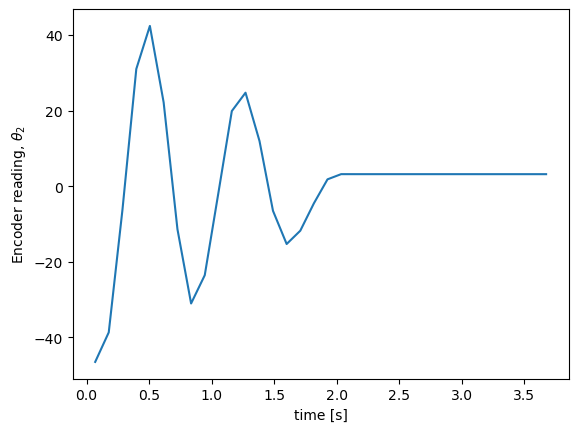

In [10]:
t1_real_raw = np.loadtxt('data/theta2_kp1.5_kd0.1')[0]
yout1_real_raw = -np.loadtxt('data/theta2_kp1.5_kd0.1')[1]

plt.plot(t1_real_raw, yout1_real_raw)
plt.xlabel('time [s]')
plt.ylabel('Encoder reading, $\\theta_2$')
plt.savefig("plots/theta2_raw.png", dpi=150,bbox_inches='tight')

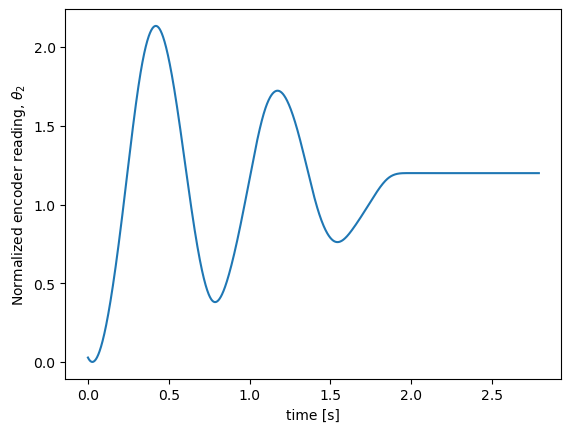

In [11]:
t2_real, y2_real_temp = load_and_clean('data/theta2_kp1.5_kd0.1', t2_sim, y2_sim)
y2_real = -y2_real_temp-np.min(-y2_real_temp)
plt.plot(t2_real, y2_real)
plt.xlabel('time [s]')
plt.ylabel('Normalized encoder reading, $\\theta_2$')
plt.savefig("plots/theta2_clean.png", dpi=150,bbox_inches='tight')

In [12]:
# Define function to minimize
def y2_difference(c_2):

    # Plant transfer functions
    #G2 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(s*(16*J_1*J_2*s + 16*J_1*c_2 + 4*J_1*l_2**2*m2*s + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_2*l_1**2*m1 + 16*c_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2*s))
    G2 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_2*s*(16*J_1*J_2*s + 16*J_1*c_2 + 4*J_1*l_2**2*m2*s + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_2*l_1**2*m1 + 16*c_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2*s))
    
    # Input PD-values
    input_Kp2 = 1.5
    input_Kd2 = 0.1

    # Converted PD-values
    Kp2 = input_Kp2*input_to_torque2
    Kd2 = input_Kd2*input_to_torque2

    # System definition
    T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)
    
    # Get simulated step response
    t2_sim, y2_sim = ct.step_response(T2)
    
    # Get real step response
    t2_real, y2_real = load_and_clean('data/theta2_kp1.5_kd0.1', t2_sim, y2_sim)
    
    return np.sum((y2_real - y2_sim)**2)

c_2 = minimize(y2_difference, 0.1, bounds=[(0, 0.015)]).x[0]
c_2

0.014996390341227427

Show simulated response

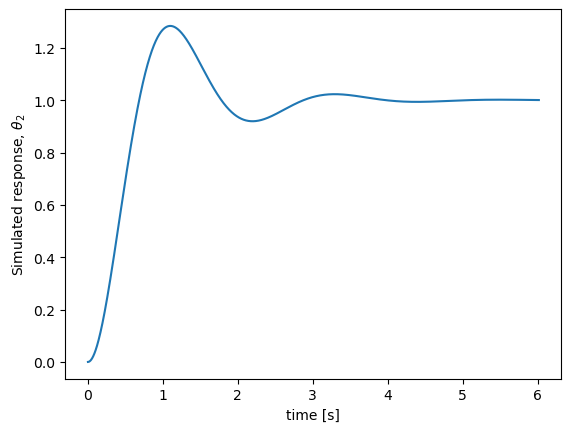

In [13]:
# Plant transfer function
G2 = (16*J_1*J_2 + 4*J_1*l_2**2*m2 + 4*J_2*l_1**2*m1 + 16*J_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2)/(J_2*s*(16*J_1*J_2*s + 16*J_1*c_2 + 4*J_1*l_2**2*m2*s + 4*J_2*l_1**2*m1*s + 16*J_2*l_1**2*m2*s + 4*c_2*l_1**2*m1 + 16*c_2*l_1**2*m2 + l_1**2*l_2**2*m1*m2*s))

# Input PD-values
input_Kp2 = 1.5
input_Kd2 = 0.1

# Converted PD-values
Kp2 = input_Kp2*input_to_torque2
Kd2 = input_Kd2*input_to_torque2

# System definition
T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)

# Plot
t2_sim, y2_sim = ct.step_response(T2)
plt.plot(t2_sim, y2_sim)
#plt.xlim(-0.2,2.6)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_sim.png", dpi=150,bbox_inches='tight')

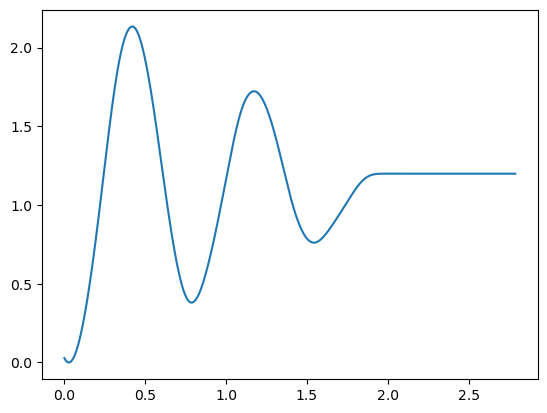

In [14]:
plt.plot(t2_real, y2_real)

# PD-tuning of $\theta_1$

## Requirements

20 % overshoot, 1/2 s rise time, 1.5 s settling time (2 % criterion). Neglecting the dynamics of $\theta_2$ and neglecting the dynamics of the motor and encoder (setting them equal to one). Gain margin must be over 5 dB and the phase margin must be over 50$^\circ$.

## Using Ziegler-Nichols tuning

$K_d$ is set to zero while $K_p$ until it reaches the ultimate gain, $K_u$, where the system reaches marginal stability

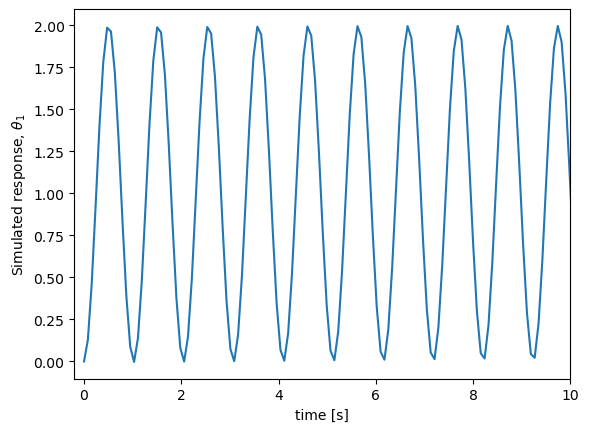

In [15]:
# Input PD-values
input_Kp1 = 3.865
input_Kd1 = 0

# Converted PD-values
Kp1 = input_Kp1*input_to_torque1
Kd1 = input_Kd1*input_to_torque1

# System definition
T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)

# Plot
t1_sim, y1_sim = ct.step_response(T1, T_num=100000)
plt.plot(t1_sim, y1_sim)
plt.xlim(-0.2, 10)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_U.png", dpi=150,bbox_inches='tight')

Then $K_p$ and $K_d$ values are calculated using the table.
https://en.m.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method

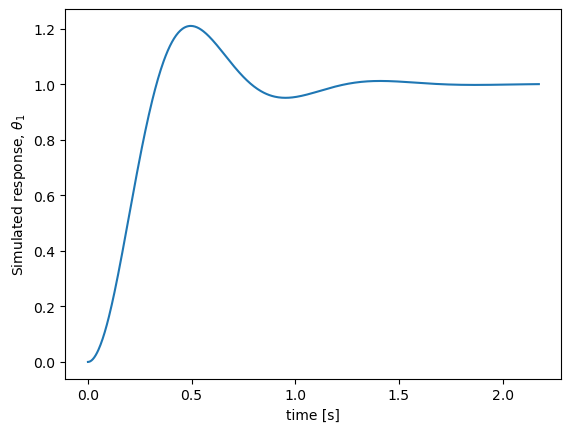

In [16]:
# Get Ziegler-Nichols values
Ku1 = Kp1
Tu1 = 1

# Converted PD-values
Kp1 = 0.8*Ku1
Kd1 = 0.1*Ku1*Tu1

# System definition
T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)

# Plot
t1_sim, y1_sim = ct.step_response(T1)
plt.plot(t1_sim, y1_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_ZN.png", dpi=150,bbox_inches='tight')

In [17]:
input_Kp1 = Kp1/input_to_torque1
input_Kp1

3.0920000000000005

In [18]:
input_Kd1 = Kd1/input_to_torque1
input_Kd1

0.38650000000000007

In [19]:
ct.step_info(T1)

{'RiseTime': 0.21610254543662955,
 'SettlingTime': 1.1379149658147525,
 'SettlingMin': 0.9009981545288417,
 'SettlingMax': 1.2096916113816993,
 'Overshoot': 20.969161138169934,
 'Undershoot': 0,
 'Peak': 1.2096916113816993,
 'PeakTime': 0.4963605340497585,
 'SteadyStateValue': 1.0}

## Manual tuning

Closed loop system cannot reaches marginal stabilty with increasing $K_p$. After this, the quarter amplitude decay is reached, by increasing $K_p$

(-0.2, 10.0)

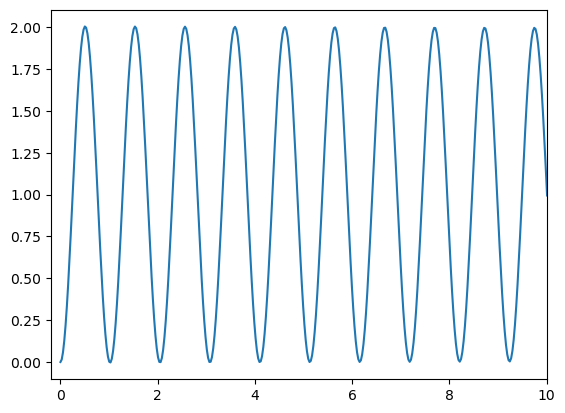

In [20]:
# Input PD-values
input_Kp1 = 3.865
input_Kd1 = 0

# Converted PD-values
Kp1 = input_Kp1*input_to_torque1
Kd1 = input_Kd1*input_to_torque1

# System definition
T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)

# Plot
t1_sim, y1_sim = ct.step_response(T1, T_num=300000)
plt.plot(t1_sim, y1_sim)
plt.xlim(-0.2, 10)

Reach the quarter amplitude decay, and tune $K_d$ to get desired characteristics

In [21]:
3.865/2

1.9325

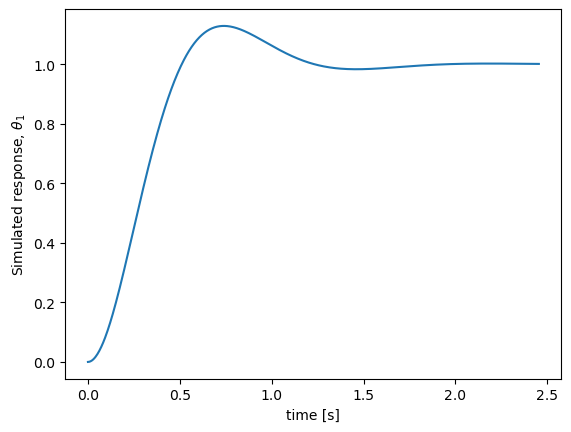

In [22]:
# Input PD-values
input_Kp1 = 1.8
input_Kd1 = 0.22

# Converted PD-values
Kp1 = input_Kp1*input_to_torque1
Kd1 = input_Kd1*input_to_torque1

# System definition
T1 = ct.feedback(Kp1*ct.feedback(G1,Kd1*s*H_pade1), H_pade1)
L1 = Kp1*ct.feedback(G1,Kd1*s*H_pade1)*H_pade1

# Plot
t1_sim, y1_sim = ct.step_response(T1)
plt.plot(t1_sim, y1_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_Manual.png", dpi=150,bbox_inches='tight')

In [23]:
ct.step_info(T1)

{'RiseTime': 0.33919312721577943,
 'SettlingTime': 1.1387197842244023,
 'SettlingMin': 0.9038982136450442,
 'SettlingMax': 1.1286292616160822,
 'Overshoot': 12.862926161608224,
 'Undershoot': 0,
 'Peak': 1.1286292616160822,
 'PeakTime': 0.7406870328997633,
 'SteadyStateValue': 1.0}

Root locus of uncompensated system with the characteristic equation found from
\begin{equation}
\frac{Y(s)}{R(s)}=\frac{KG(s)}{1+KG(s)H(s)},
\end{equation}

which gives the characteristic equation
\begin{equation}
1 + KG(s)H(s) = 0
\end{equation}

So for varying the proportional gain the root locus is


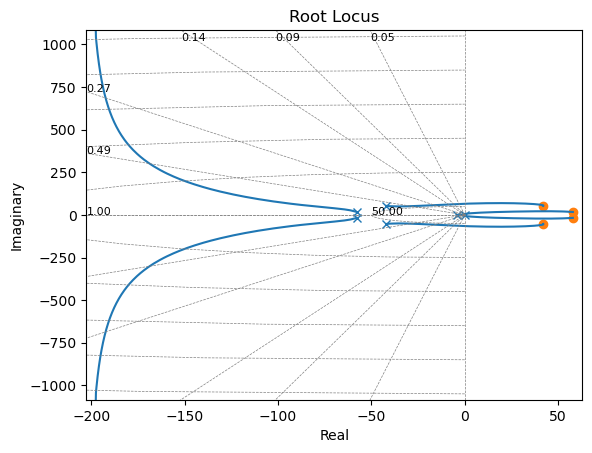

In [24]:
rlist1, klist1 = ct.rlocus(G1*H_pade1)
plt.savefig("plots/theta1_rLocus.png", dpi=150,bbox_inches='tight')

When $K_D$ increases the complex poles move to the left which
\begin{itemize}
    \item increases the associated damping ratio
    \item decrease the percent overshoot
    \item reduce the settling time
\end{itemize}

# Using frequency response methods

## Bode plot

Use the openloop transfer function with Kp and Kd

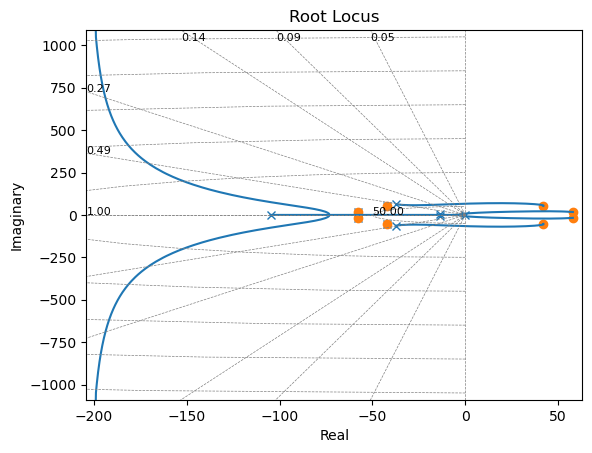

In [25]:
L1 = Kp1*ct.feedback(G1,Kd1*s*H_pade1)*H_pade1
rlist1, klist1 = ct.rlocus(L1)
plt.savefig("plots/theta1_LrLocus.png", dpi=150,bbox_inches='tight')

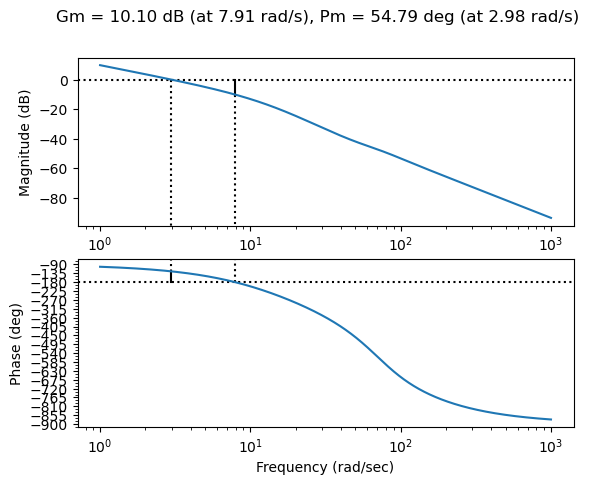

In [26]:
mag1, pm1, wg1 = ct.bode(L1, margins=True, dB=True)
plt.savefig("plots/theta1_Lbode.png", dpi=150,bbox_inches='tight')

The phase and gain margin are acceptable. Calculating the bandwidth

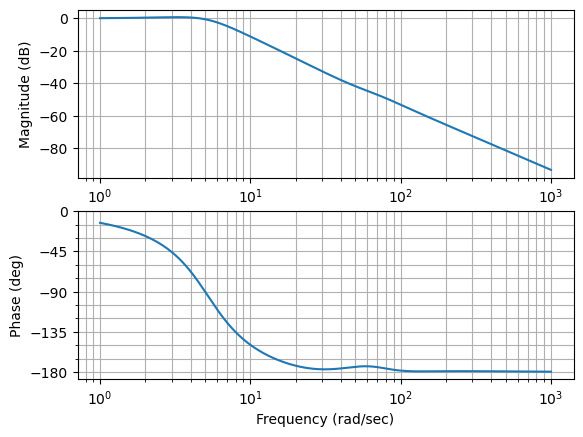

In [27]:
mag1, pm1, wg1 = ct.bode(T1, dB=True)
plt.savefig("plots/theta1_bode.png", dpi=150,bbox_inches='tight')

In [28]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx = find_nearest(ct.mag2db(mag1), -3)

omega_B1 = wg1[idx]

eq_disp('\\omega_B', round(omega_B1,3), 'rad/s')

<IPython.core.display.Latex object>

## Nyquist plot

The number of encirclements of the -1 point is displayed and the nyquist plot is made:

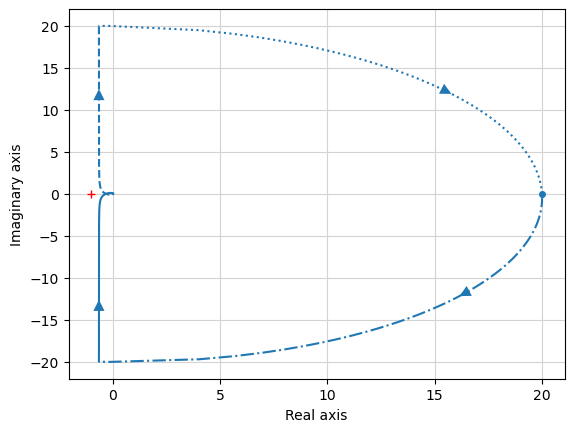

In [29]:
ct.nyquist_plot(L1)
plt.savefig("plots/theta1_Nyquist.png", dpi=150,bbox_inches='tight')

## Nichols plot

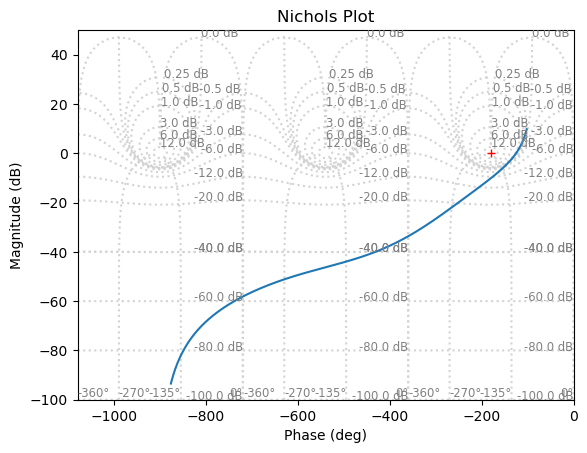

In [30]:
ct.nichols_plot(L1)
plt.savefig("plots/theta1_Nichols.png", dpi=150,bbox_inches='tight')

# PD-tuning of $\theta_2$

## Requirements

The same requirements as for $\theta_1$ are used.

## Using Ziegler-Nichols tuning

$K_d$ is set to zero while $K_p$ until it reaches the ultimate gain, $K_u$, where the system reaches marginal stability

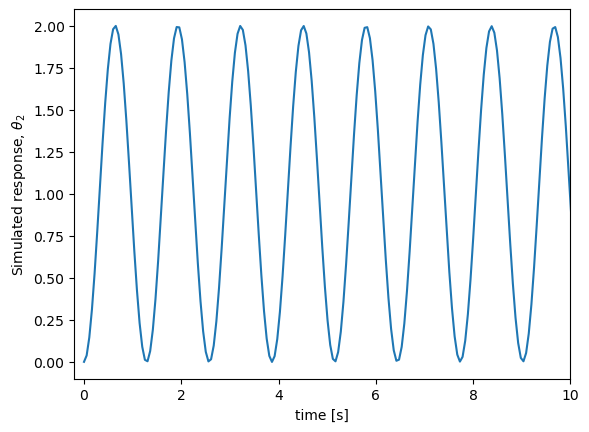

In [31]:
# Input PD-values
input_Kp2 = 4.310
input_Kd2 = 0

# Converted PD-values
Kp2 = input_Kp2*input_to_torque2
Kd2 = input_Kd2*input_to_torque2

# System definition
T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)

# Plot
t2_sim, y2_sim = ct.step_response(T2, T_num=300000)
plt.plot(t2_sim, y2_sim)
plt.xlim(-0.2, 10)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_U.png", dpi=150,bbox_inches='tight')

Then $K_p$ and $K_d$ values are calculated using the table.
https://en.m.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method

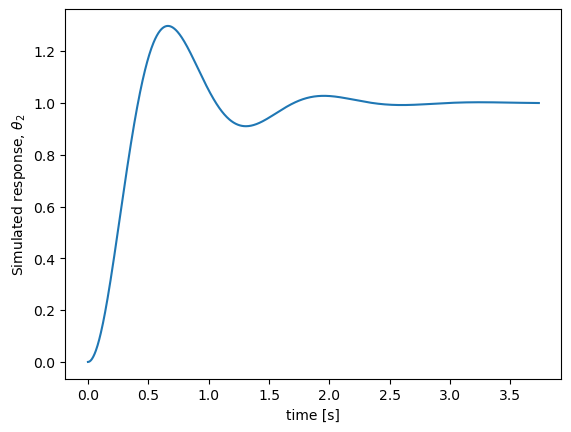

In [32]:
# Get Ziegler-Nichols values
Ku2 = Kp2
Tu2 = 1.05

# Converted PD-values
Kp2 = 0.8*Ku2
Kd2 = 0.1*Ku2*Tu2

# System definition
T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)

t2_sim, y2_sim = ct.step_response(T2)
plt.plot(t2_sim, y2_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_ZN.png", dpi=150,bbox_inches='tight')

In [33]:
input_Kp2 = Kp2/input_to_torque2
input_Kp2

3.448

In [34]:
input_Kd2 = Kd2/input_to_torque2
input_Kd2

0.45255

In [35]:
ct.step_info(T2)

{'RiseTime': 0.27299652065726704,
 'SettlingTime': 2.114859122053765,
 'SettlingMin': 0.9015400167768759,
 'SettlingMax': 1.2971944611539747,
 'Overshoot': 29.71944611539749,
 'Undershoot': 0,
 'Peak': 1.2971944611539747,
 'PeakTime': 0.6634852147619654,
 'SteadyStateValue': 0.9999999999999999}

## Manual tuning

Closed loop system cannot reach marginal stabilty, as $K_p$ should be zero. The quarter amplitude decay is reached, by increasing $K_p$

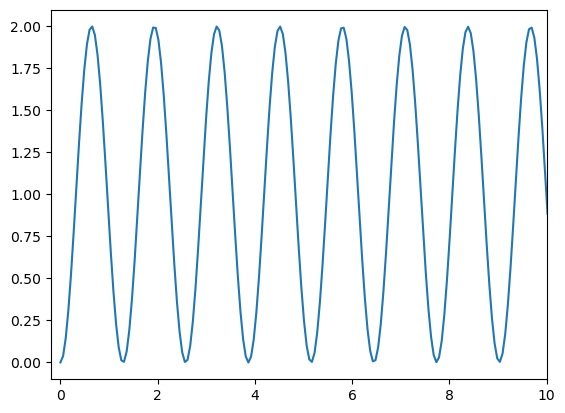

In [36]:
# Input PD-values
input_Kp2 = 4.310
input_Kd2 = 0

# Converted PD-values
Kp2 = input_Kp2*input_to_torque2
Kd2 = input_Kd2*input_to_torque2

# System definition
T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)

# Plot
t2_sim, y2_sim = ct.step_response(T2, T_num=300000)
plt.xlim(-0.2, 10)
plt.plot(t2_sim, y2_sim)

In [37]:
4.310/2

2.155

Reach the quarter amplitude decay, and tune $K_d$ to get desired characteristics

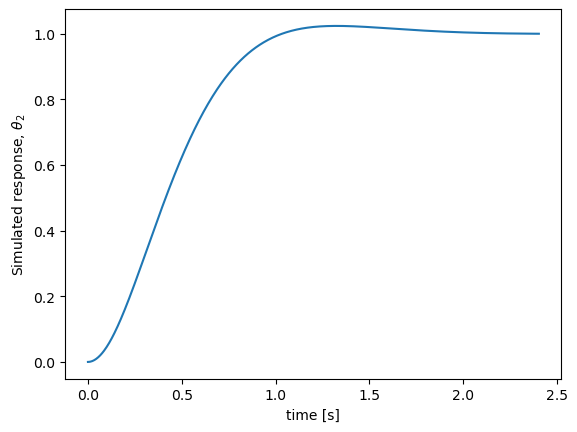

In [38]:
# Input PD-values
input_Kp2 = 1.6
input_Kd2 = 0.43

# Converted PD-values
Kp2 = input_Kp2*input_to_torque2
Kd2 = input_Kd2*input_to_torque2

# System definition
T2 = ct.feedback(Kp2*ct.feedback(G2,Kd2*s*H_pade2), H_pade2)

# Plot
t2_sim, y2_sim = ct.step_response(T2)
plt.plot(t2_sim, y2_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_Manual.png", dpi=150,bbox_inches='tight')

Root locus of uncompensated system with the characteristic equation found from
\begin{equation}
\frac{Y(s)}{R(s)}=\frac{KG(s)}{1+KG(s)},
\end{equation}

which gives the characteristic equation
\begin{equation}
1 + KG(s) = 0
\end{equation}

So for varying the proportional gain the root locus is


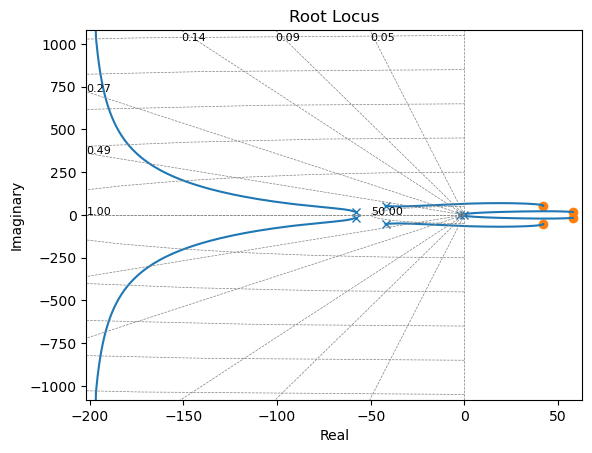

In [39]:
rlist2, klist2 = ct.rlocus(G2*H_pade2)
plt.savefig("plots/theta2_rLocus.png", dpi=150,bbox_inches='tight')

When $K_D$ increases the complex poles move to the left which
\begin{itemize}
    \item increases the associated damping ratio
    \item decrease the percent overshoot
    \item reduce the settling time
\end{itemize}

Requirements are met with these values for $K_p$ and $K_D$

## Using frequency response methods

## Bode plot

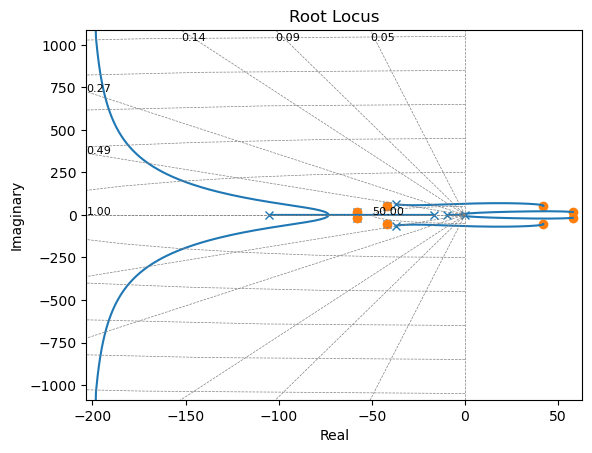

In [40]:
L2 = Kp2*ct.feedback(G2,Kd2*s*H_pade2)*H_pade2
rlist2, klist2 = ct.rlocus(L2)
plt.savefig("plots/theta2_LrLocus.png", dpi=150,bbox_inches='tight')

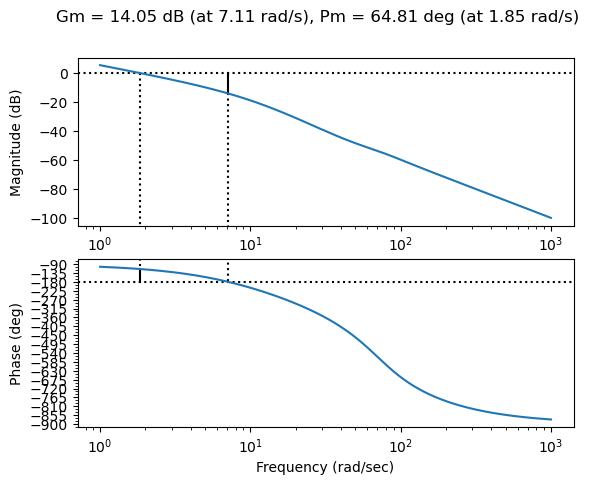

In [41]:
mag2, pm2, wg2 = ct.bode(L2, margins=True, dB=True)
plt.savefig("plots/theta2_Lbode.png", dpi=150,bbox_inches='tight')

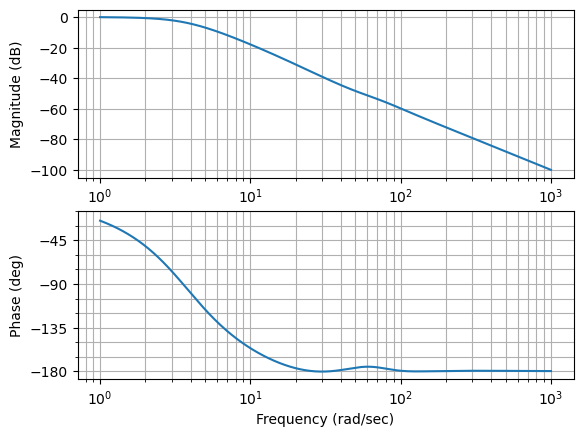

In [42]:
mag2, pm2, wg2 = ct.bode(T2, dB=True)
plt.savefig("plots/theta2_bode.png", dpi=150,bbox_inches='tight')

The phase and gain margin are acceptable. Calculating the bandwidth

In [43]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx = find_nearest(ct.mag2db(mag2), -3)

omega_B2 = wg2[idx]

eq_disp('\\omega_B', round(omega_B2,3), 'rad/s')

<IPython.core.display.Latex object>

## Nyquist plot

The number of encirclements of the -1 point is displayed and the nyquist plot is made:

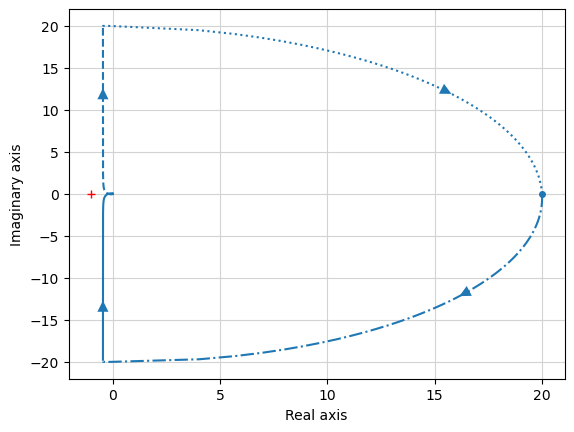

In [44]:
ct.nyquist_plot(L2)
plt.savefig("plots/theta2_Nyquist.png", dpi=150,bbox_inches='tight')

## Nichols plot

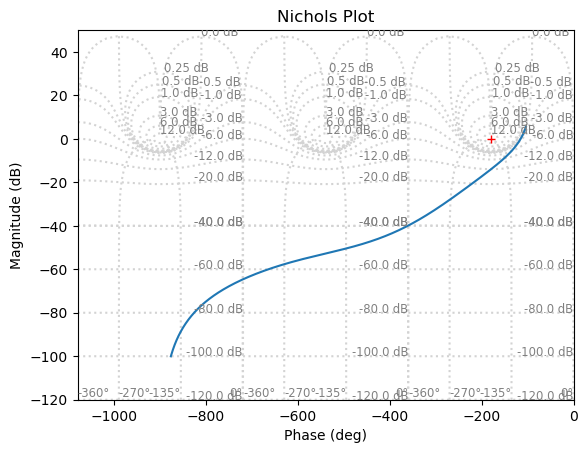

In [45]:
ct.nichols_plot(L2)
plt.savefig("plots/theta2_Nichols.png", dpi=150,bbox_inches='tight')

# Create table for step response characteristics

In [46]:
import pandas as pd
df = pd.DataFrame(ct.step_info(T1).items(), columns=["Characteristic", "$\\theta_1$"])
df2 = pd.DataFrame(ct.step_info(T2).items(), columns=["Characteristic", "$\\theta_2$"])
df["$\\theta_2$"]=df2["$\\theta_2$"]

In [47]:
print(df.round(3).to_latex(index=False))

\begin{tabular}{lrr}
\toprule
  Characteristic &  \$\textbackslash theta\_1\$ &  \$\textbackslash theta\_2\$ \\
\midrule
        RiseTime &       0.339 &       0.634 \\
    SettlingTime &       1.139 &       1.498 \\
     SettlingMin &       0.904 &       0.902 \\
     SettlingMax &       1.129 &       1.024 \\
       Overshoot &      12.863 &       2.353 \\
      Undershoot &       0.000 &       0.000 \\
            Peak &       1.129 &       1.024 \\
        PeakTime &       0.741 &       1.326 \\
SteadyStateValue &       1.000 &       1.000 \\
\bottomrule
\end{tabular}



In [48]:
ct.step_info(T1)

{'RiseTime': 0.33919312721577943,
 'SettlingTime': 1.1387197842244023,
 'SettlingMin': 0.9038982136450442,
 'SettlingMax': 1.1286292616160822,
 'Overshoot': 12.862926161608224,
 'Undershoot': 0,
 'Peak': 1.1286292616160822,
 'PeakTime': 0.7406870328997633,
 'SteadyStateValue': 1.0}

In [49]:
ct.step_info(T2)

{'RiseTime': 0.6336251861259262,
 'SettlingTime': 1.4979725867650973,
 'SettlingMin': 0.9016645744033573,
 'SettlingMax': 1.0235276417609667,
 'Overshoot': 2.3527641760966667,
 'Undershoot': 0,
 'Peak': 1.0235276417609667,
 'PeakTime': 1.3257918296656608,
 'SteadyStateValue': 1.0}

# Final gain values

In [50]:
input_Kp1

1.8

In [51]:
input_Kd1

0.22

In [52]:
input_Kp2

1.6

In [53]:
input_Kd2

0.43

# Disturbance rejection

{'RiseTime': 0.3391931272157803,
 'SettlingTime': 1.1387197842244055,
 'SettlingMin': 20.08663633525018,
 'SettlingMax': 25.080662082052395,
 'Overshoot': 12.862979369235783,
 'Undershoot': 0,
 'Peak': 25.080662082052395,
 'PeakTime': 0.7406870328997652,
 'SteadyStateValue': 22.22222222222222}

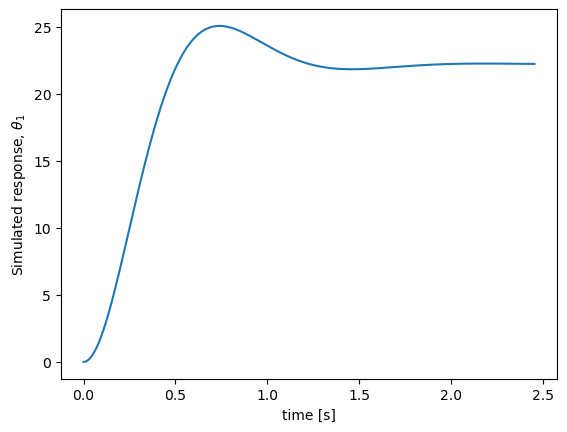

In [54]:
# System definition
T1_dist = ct.feedback(G1, H_pade1*(Kp1+Kd1*s))

# Plot
t1_sim, y1_sim = ct.step_response(T1_dist)
plt.plot(t1_sim, y1_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_Dist.png", dpi=150,bbox_inches='tight')
ct.step_info(T1_dist)

{'RiseTime': 0.6336251861259272,
 'SettlingTime': 1.4979725867650997,
 'SettlingMin': 22.5416301770729,
 'SettlingMax': 25.588209228058588,
 'Overshoot': 2.3528369122343813,
 'Undershoot': 0,
 'Peak': 25.588209228058588,
 'PeakTime': 1.3257918296656628,
 'SteadyStateValue': 24.999999999999993}

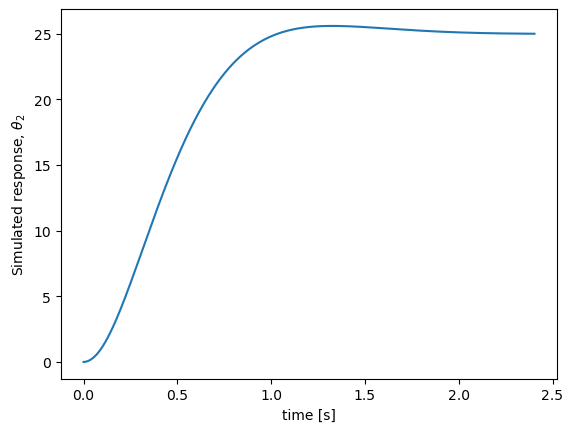

In [55]:
# System definition
T2_dist = ct.feedback(G2, H_pade2*(Kp2+Kd2*s))

# Plot
t2_sim, y2_sim = ct.step_response(T2_dist)
plt.plot(t2_sim, y2_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_Dist.png", dpi=150,bbox_inches='tight')
ct.step_info(T2_dist)

## Rejection by increasing controller gains

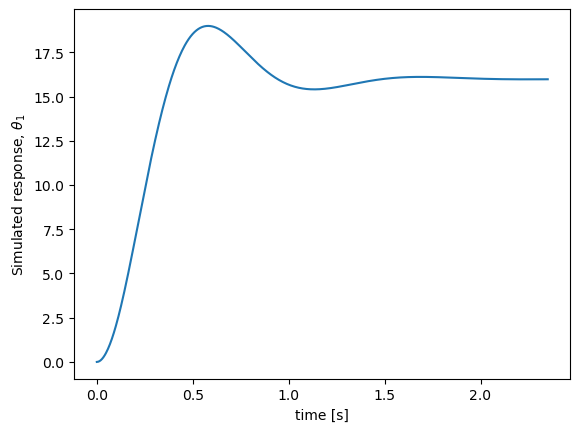

In [56]:
# Input PD-values
input_Kp1 = 2.5
input_Kd1 = 0.3

# Converted PD-values
Kp1 = input_Kp1*input_to_torque1
Kd1 = input_Kd1*input_to_torque1

# System definition
T1_dist = ct.feedback(G1, H_pade1*(Kp1+Kd1*s))

# Plot
t1_sim, y1_sim = ct.step_response(T1_dist)
plt.plot(t1_sim, y1_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_DistIncreaseGC.png", dpi=150,bbox_inches='tight')

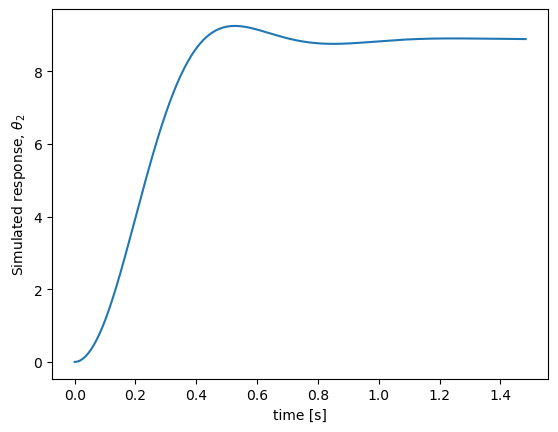

In [57]:
# Input PD-values
input_Kp2 = 4.5
input_Kd2 = 1

# Converted PD-values
Kp2 = input_Kp2*input_to_torque2
Kd2 = input_Kd2*input_to_torque2

# System definition
T2_dist = ct.feedback(G2, H_pade2*(Kp2+Kd2*s))

# Plot
t2_sim, y2_sim = ct.step_response(T2_dist)
plt.plot(t2_sim, y2_sim)
#ct.step_info(T2_dist)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_DistIncreaseGc.png", dpi=150,bbox_inches='tight')

# Rejection by adding an integrator

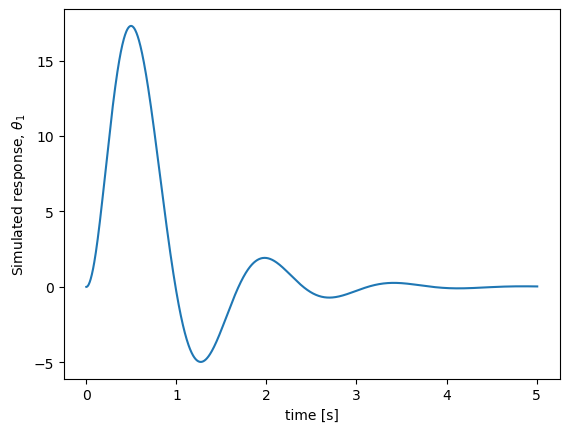

In [58]:
# Input PID-values
input_Ki1 = 5

# Converted PD-values
Ki1 = input_Ki1*input_to_torque1

# System definition
T1_dist = ct.feedback(G1, H_pade1*(Kp1+Kd1*s+Ki1/s))

# Plot
t1_sim, y1_sim = ct.step_response(T1_dist)
plt.plot(t1_sim, y1_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_1$')
plt.savefig("plots/theta1_DistIntegrator.png", dpi=150,bbox_inches='tight')

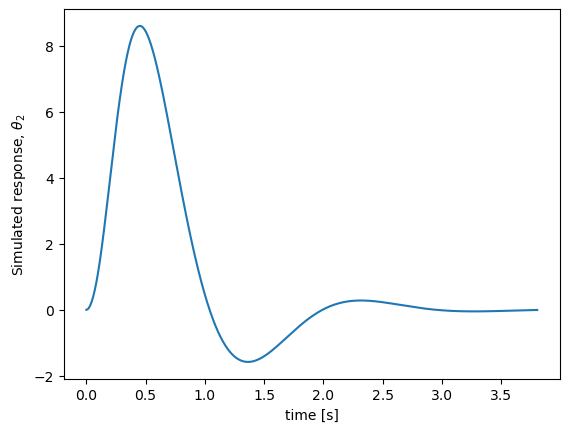

In [59]:
# Input PiD-values
input_Ki2 = 10

# Converted OID-values
Ki2 = input_Ki2*input_to_torque2

# System definition
T2_dist = ct.feedback(G2, H_pade2*(Kp2+Kd2*s+Ki2/s))

# Plot
t2_sim, y2_sim = ct.step_response(T2_dist)
plt.plot(t2_sim, y2_sim)
plt.xlabel('time [s]')
plt.ylabel('Simulated response, $\\theta_2$')
plt.savefig("plots/theta2_DistIntegrator.png", dpi=150,bbox_inches='tight')

## Checking the system response

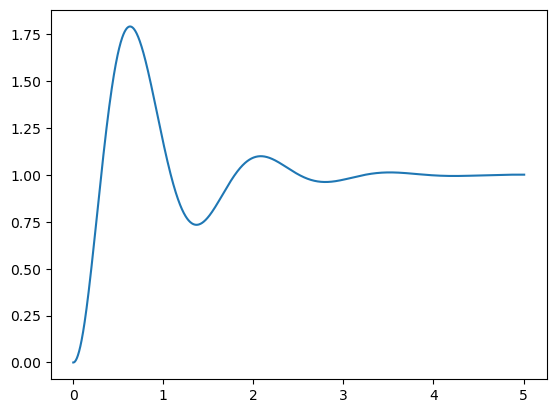

In [60]:
# System definition
T1 = ct.feedback((Kp1+Ki1/s)*ct.feedback(G1,(Kd1*s)*H_pade1), H_pade1)

t1_sim, y1_sim = ct.step_response(T1)
plt.plot(t1_sim, y1_sim)

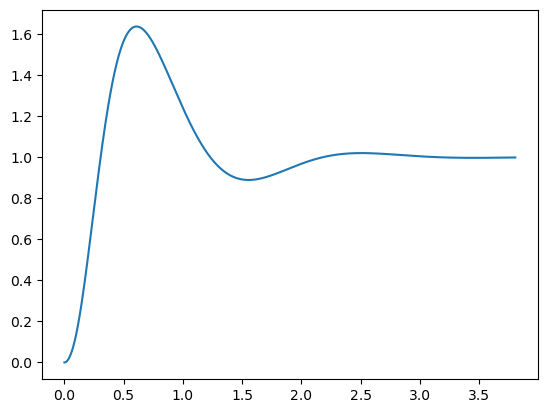

In [61]:
# System definition
T2 = ct.feedback((Kp2+Ki2/s)*ct.feedback(G2,(Kd2*s)*H_pade2), H_pade2)

t2_sim, y2_sim = ct.step_response(T2)
plt.plot(t2_sim, y2_sim)

# Experiment using chosen gains

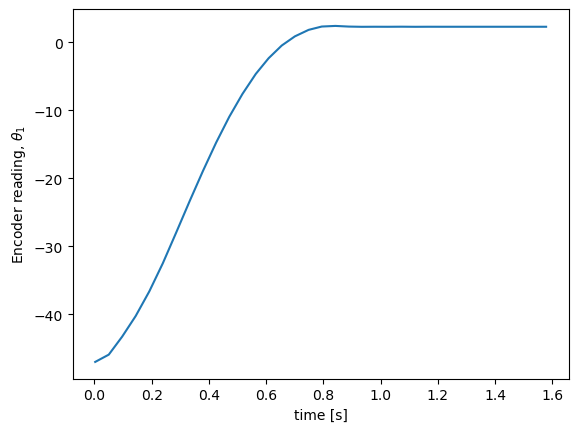

In [62]:
t1_real_raw = np.loadtxt('data/position_data_05')[0]
yout1_real_raw = np.loadtxt('data/position_data_05')[1]

plt.plot(t1_real_raw, yout1_real_raw)
plt.xlabel('time [s]')
plt.ylabel('Encoder reading, $\\theta_1$')
plt.savefig("plots/theta1_exp.png", dpi=150,bbox_inches='tight')

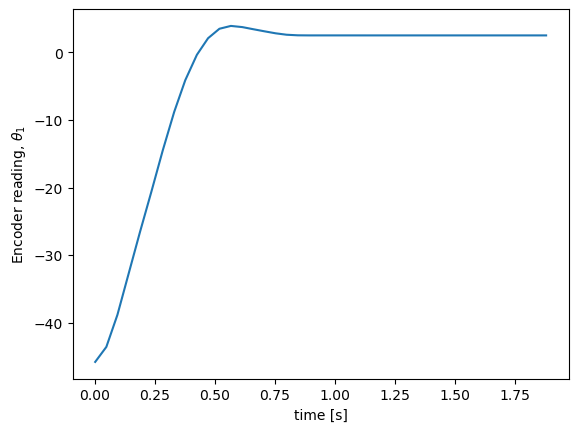

In [63]:
t1_real_raw = np.loadtxt('data/position_data_05_nichols')[0]
yout1_real_raw = np.loadtxt('data/position_data_05_nichols')[1]

plt.plot(t1_real_raw, yout1_real_raw)
plt.xlabel('time [s]')
plt.ylabel('Encoder reading, $\\theta_1$')
plt.savefig("plots/theta1_exp_nichols.png", dpi=150,bbox_inches='tight')

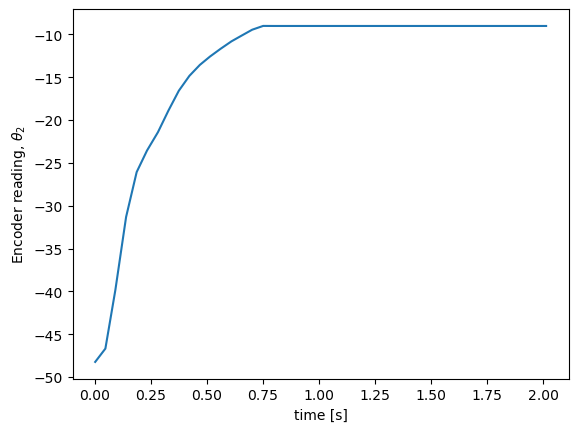

In [64]:
t1_real_raw = np.loadtxt('data/position_data_06')[0]
yout1_real_raw = -np.loadtxt('data/position_data_06')[1]

plt.plot(t1_real_raw, yout1_real_raw)
plt.xlabel('time [s]')
plt.ylabel('Encoder reading, $\\theta_2$')
plt.savefig("plots/theta2_exp.png", dpi=150,bbox_inches='tight')

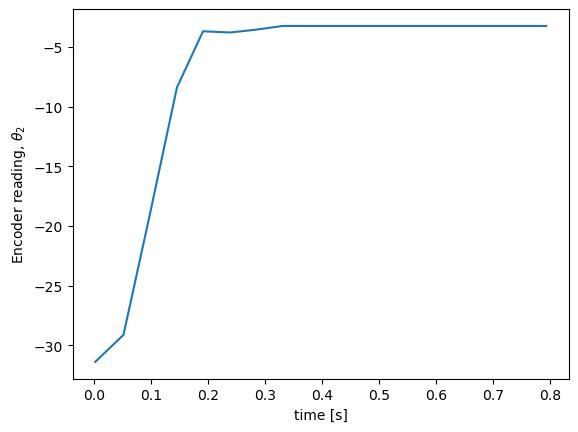

In [65]:
t1_real_raw = np.loadtxt('data/position_data_06_nichols')[0]
yout1_real_raw = -np.loadtxt('data/position_data_06_nichols')[1]

plt.plot(t1_real_raw, yout1_real_raw)
plt.xlabel('time [s]')
plt.ylabel('Encoder reading, $\\theta_2$')
plt.savefig("plots/theta2_exp_nichols.png", dpi=150,bbox_inches='tight')

# Motor controller (motorcontrol.py)

In [ ]:
"""
This is a simple example of PD controller to control the torque of the single leg.
Using RMD v2.0 to set the maximum current to 60. otherwise it is very dangerous if there is something wrong in the code. 
--Yixiong

"""



import numpy as np
import serial
import time
import binascii
import struct
import re
import checksum_calculator as csum


class Motor:

    def __init__(self, id: str, serial, offset_torque: int=0, kp=1.5, kd=0) -> None:
        """
        offset_torque should be a integer value between -2000 ~ 2000
        """
        self.id = id
        self.ser = serial
        self.kp = kp
        self.kd = kd
        self.position_ref = self.read_position()
        self.i = 0
        self.torque_t = "0000"
        self.q_t = []
        self.tspan = []
        self.t_start = 0
        self.offset_torque = offset_torque
        self.first = True

    def data_processing_position(self, data):
        '''
        receive the data from motor and read the encoder postion and return the angle in degree
        '''
        if data[0:2]!='3e' or data[2:4]!='92':
            return
        encoder_data=data[10:26]
        if encoder_data[-1]=='f':
            neghex_pack=binascii.unhexlify(encoder_data)
            neg=struct.unpack('q', neghex_pack)

            encoder_dec=neg[0]
        else:
            encoder_data=re.findall(r'\w{1,2}',encoder_data) #divide the data to groupds, '3e92' to ['3e','92']
            encoder_data=encoder_data[::-1]
            encoder_data = ''.join(encoder_data)
            encoder_dec=int(encoder_data,16)

        return encoder_dec/100/9

    def data_processing_torque(self, data):
        '''
        receive the data from motor and return the torque
        '''
        torque_data=data[12:16]
        torque_data=re.findall(r'\w{1,2}',torque_data)
        torque_data=torque_data[::-1]
        torque_data = ''.join(torque_data)
        torque_dec=int(torque_data,16)
        if torque_dec>2048: #if the torque is negetive
            torque_dec=torque_dec-65535-1
        
        return torque_dec

    def data_processing_speed(self, data):
        speed_data=data[16:20]
        speed_data=re.findall(r'\w{1,2}',speed_data)
        speed_data=speed_data[::-1]
        speed_data = ''.join(speed_data)
        speed_dec=int(speed_data,16)
        # print(speed_dec)
        if speed_dec>30000: #if the speed is negetive, the hex should be counted from the end
            speed_dec=speed_dec-65535

        return speed_dec/9

    def read_position(self):
        data = '3E 92 '+self.id+' 00'
        send_position=bytes.fromhex(data + " " + csum.compute_checksum8_mod256(data))
        self.ser.write(send_position)
        count=self.ser.inWaiting()
        while not count:
            count = self.ser.inWaiting()
        if count>0:
            data = None
            while (not data):
                data=self.ser.read(count)
            data=binascii.b2a_hex(data).decode('gbk')
            # print(data)
            return self.data_processing_position(data)
        
    def read_motor_state_2(self):
        data = "3E 9C " + self.id + " 00"
        command = data + " " + csum.compute_checksum8_mod256(data)
        self.ser.write(bytes.fromhex(command))
        
        while(not self.ser.in_waiting()):
            pass
        data = self.ser.read(self.ser.in_waiting())



    def PD_controller(self,q_d,q_t,q_dot_t):
        '''
        here the kp and kd is the stiffness and damping. User defined
        based on the position error to calculate the torque
        '''
        torque=(self.kp*(q_d-q_t)-self.kd*q_dot_t)
        torque += self.offset_torque
        if torque < 0:
            torque=65535+torque
        torque=hex(int(torque))[2:6]
        template=list('0000')
        
        for i in range(len(torque)):
            template[-1-i]=torque[-1-i]
        
        template=''.join(template)
        return template

    def char_checksum(self, data, byteorder='little'):
        '''
        checksum function
        '''
        length = len(data)
        checksum = 0
        for i in range(0, length):
            x = int.from_bytes(data[i:i+1], byteorder, signed=True)
            if x>0 and checksum >0:
                checksum += x
                if checksum > 0x7F: 
                    checksum = (checksum&0x7F) - 0x80 
            elif x<0 and checksum <0:
                checksum += x
                if checksum < -0x80: 
                    checksum &= 0x7F
            else:
                checksum +=x 
            #print(checksum)    

        if checksum<0:
            checksum=256+checksum
        return hex(checksum)


    def torque_control(self, torque):
        '''
        based on the position error
        '''
        data1 = '3E A1 '+self.id+' 02'
        torque_command=list(data1 + " " + csum.compute_checksum8_mod256(data1) + ' E1 FF E0') #last part of string is placeholder
        torque_command[15]=torque[2]
        torque_command[16]=torque[3]
        torque_command[18]=torque[0]
        torque_command[19]=torque[1]
        if torque=='0000':
            cs='00'
        else:
            cs=self.char_checksum(bytes.fromhex(torque))[2:4]
            if len(cs)==1:
                cs='0'+cs[0]
        torque_command[-1]=cs[1]
        torque_command[-2]=cs[0]

        torque_command=''.join(torque_command)
        send_torque=bytes.fromhex(torque_command)
        self.ser.write(send_torque)
        time.sleep(0.01)
        count=self.ser.inWaiting()
        if count>0:
            data=self.ser.read(count)
            data=binascii.b2a_hex(data).decode('gbk')
            # print(data)
            # print(data_processing_torque(data))
    
    def position_control(self, pos:int, spin_dir_cc=True):
        """
        pos is a value between 0~35999 corresponding to 0~360 degrees
        """
        if pos<0:
            pos = 4294967295+pos
        
        pos_hex = int(pos).to_bytes(4, "little").hex()

        data1 = "3E A7 " + self.id + " "+"04"

        data2 = pos_hex[:2] + " " + pos_hex[2:4] + " "+ pos_hex[4:6] + " " + pos_hex[6:8]
        
        command = (data1 + " "+csum.compute_checksum8_mod256(data1)+" "+data2+" " + csum.compute_checksum8_mod256(data2))
        self.ser.write(bytes.fromhex(command.upper()))



    def read_torque(self):
        '''
        read torque and speed
        '''
        data = '3E 9C ' + self.id +' 00 '
        command_torque= data+csum.compute_checksum8_mod256(data)
        send_torque=bytes.fromhex(command_torque)
        self.ser.write(send_torque)
        time.sleep(0.01)
        count=self.ser.inWaiting()
        if count>0:
            data=self.ser.read(count)
            data=binascii.b2a_hex(data).decode('gbk')
            return self.data_processing_speed(data)
            # print(data)
            # print(data_processing_torque(data))

    def Step(self, print=False):
            
            if not self.position_ref:
                self.position_ref = self.read_position()
            q_t=self.read_position()
            
            if not self.first:
                self.q_t.append(q_t-self.position_ref)
                self.tspan.append(time.perf_counter()-self.t_start)
            
            self.first=False

            if (5<self.i and print):
                print("position ", q_t)
                
                print("torque ", int(torque_t.lstrip("0") or "0", 16))
                self.i=0
            q_dot_t=self.read_torque()
            torque_t=self.PD_controller(self.position_ref, q_t, q_dot_t) # set kd to zero first. because it is dangerous. 

            self.i+=1
            self.torque_control(torque_t)

    def start(self):
        self.t_start = time.perf_counter()

    def set_ref_pos(self):
        while (not self.read_position()):
            pass
        self.position_ref =  self.read_position()

    def stop(self):
        data = "3E 81 " + self.id + " 00"
        command = data + " " +csum.compute_checksum8_mod256(data)
        self.ser.write(bytes.fromhex(command))
        self.savetxt()
        self.q_t = []
        self.tspan = []

    def savetxt(self):
        np.savetxt("position_data_"+self.id, np.array([self.tspan, self.q_t]))

def get_running_angles():
    motor_360_val = 35999
    angles = np.loadtxt("Angles_diff.csv", delimiter=",").T
    angles *=1000
    return angles

def runtest():
    ser1=serial.Serial("COM6",115200)
    ser2=serial.Serial("COM5",115200)
    angles = get_running_angles()
    m1 = Motor("05", ser2, kp=5, kd=0.35, offset_torque=0)
    m2 = Motor("06", ser1, kp=1.5, kd=0.1, offset_torque=0)
    #m1.position_control(angles[0,0])
    #m2.position_control(angles[1,0])
    print("press enter when legs are in position")
    input()
    m1.set_ref_pos()
    m2.set_ref_pos()
    try:
        m1.start()
        m2.start()
        prev1 = m1.read_position()
        prev2 = m2.read_position()
        while True:
            for angle in angles.T: 
                m1.position_control(angle[0])
                m2.position_control(angle[1])
                pos1 = m1.read_position()
                pos2 = m2.read_position()
                while (
                    not pos1 or not pos2 or
                    abs(prev1-pos1) < abs(angle[0]/1000)-5 or 
                    abs(prev2-pos2) < abs(angle[1]/1000)-5):
                    pos1 = m1.read_position()
                    pos2 = m2.read_position()
                prev1 = m1.read_position()
                prev2 = m2.read_position()
                #time.sleep(1)

        m1.stop()
        m2.stop()
        m1.ser.close()
        m2.ser.close()
    except KeyboardInterrupt:
        m1.stop()
        m2.stop()
        m1.ser.close()
        m2.ser.close()

def pid_test():
    ser1=serial.Serial("COM6",115200)
    ser2=serial.Serial("COM5",115200)
    angles = get_running_angles()
    m1 = Motor("05", ser2, kp=3.6, kd=0.22, offset_torque=40)
    m2 = Motor("06", ser1, kp=0.45, kd=0.07, offset_torque=-15)
    try:
        m2.Step()
        m1.position_control(0)
        print("Move the robot to desired offset, then press enter")
        input()
        m1.start()
        m2.start()
        while True:
            m1.position_control(0)
            m2.Step()
            time.sleep(0.0001)

    except KeyboardInterrupt:
        m1.stop()
        m2.stop()
        m1.ser.close()
        m2.ser.close()

if __name__ == "__main__":
    #runtest()
    pid_test()
# print(char_checksum(bytes.fromhex('ECFF')))

# Plot experiment response

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
M05 = np.loadtxt("position_data_05")
M06 = np.loadtxt("position_data_06")

C:\Users\osteb\AppData\Local\Temp\ipykernel_10216\2943878679.py:1: UserWarning: loadtxt: Empty input file: "position_data_05"
  M05 = np.loadtxt("position_data_05")


IndexError: index 0 is out of bounds for axis 0 with size 0

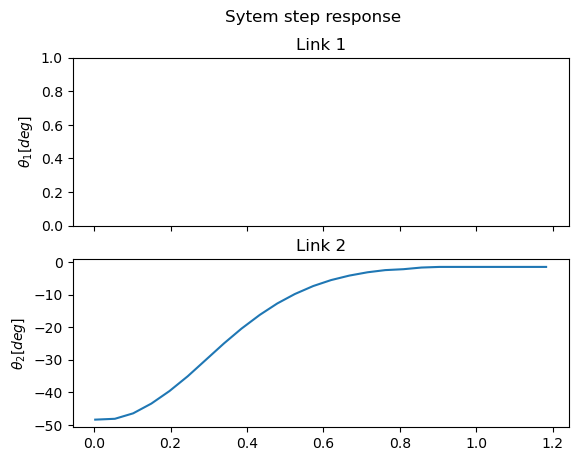

In [37]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Sytem step response")
ax1.set_title("Link 1")
ax2.set_title("Link 2")
ax1.set_ylabel(r"$\theta_1[deg]$")
ax2.set_ylabel(r"$\theta_2[deg]$")
ax2.plot(M06[0], -M06[1])
ax1.plot(M05[0], M05[1])

In [ ]:
motor_360_val = 35999
angles = np.loadtxt("Angles_diff.csv", delimiter=",").T


In [ ]:
motor_360_val = 35999
angles = np.loadtxt("Angles.csv", delimiter=",").T

In [ ]:
angles[0]*100

array([ -9365.2, -13679. ,  -8871.8,  -3843.4,  -7245.1,  -9365.2])

In [ ]:
angles[0]*100

array([ -9365.2, -13679. ,  -8871.8,  -3843.4,  -7245.1,  -9365.2])

In [ ]:
np.sum(angles[1])

299.0482

In [ ]:
angles = np.loadtxt("Angles.csv", delimiter=",").T

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Raw-data" data-toc-modified-id="Raw-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Raw data</a></span></li></ul></li><li><span><a href="#Accelerometer-data" data-toc-modified-id="Accelerometer-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Accelerometer data</a></span><ul class="toc-item"><li><span><a href="#Finding-the-orientation-of-the-accelerometers" data-toc-modified-id="Finding-the-orientation-of-the-accelerometers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Finding the orientation of the accelerometers</a></span></li><li><span><a href="#Removing-bias" data-toc-modified-id="Removing-bias-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Removing bias</a></span></li><li><span><a href="#Removing-high-frequency-noise" data-toc-modified-id="Removing-high-frequency-noise-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Removing high frequency noise</a></span></li></ul></li><li><span><a href="#Gyro-data" data-toc-modified-id="Gyro-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gyro data</a></span><ul class="toc-item"><li><span><a href="#Removing-drift" data-toc-modified-id="Removing-drift-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing drift</a></span></li><li><span><a href="#Compensating-for-the-rotation-of-accelerometer-sensor" data-toc-modified-id="Compensating-for-the-rotation-of-accelerometer-sensor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compensating for the rotation of accelerometer sensor</a></span></li></ul></li></ul></div>

In [233]:
import numpy as np 
import scipy as sci
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage.interpolation import rotate
from scipy.signal import filtfilt
from scipy.signal import butter

In [234]:
data1 = np.loadtxt("Time_AccX_AccY_yaw_theta1.txt", delimiter=",")
data2 = np.loadtxt("Time_AccX_AccY_yaw_theta2.txt", delimiter=",")

In [235]:
def unpack_data(data):
    time = data[0]
    AccX= data[1]
    AccY= data[2]
    yaw= data[3]
    return time, AccX, AccY, yaw

def find_drift(time, yaw):
    peaks = find_peaks(yaw, 25)[0]
    t = time[peaks]
    y = yaw[peaks]
    line = sci.stats.linregress(t, y)
    return line

def remove_drift(data):
    time, AccX, AccY, yaw = unpack_data(data)
    line = find_drift(time, yaw)
    line_f = lambda x: line.slope*x
    return yaw - line_f(time)

def plot_both(x, y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(x[0], y[0])
    ax2.plot(x[1], y[1])

## Raw data

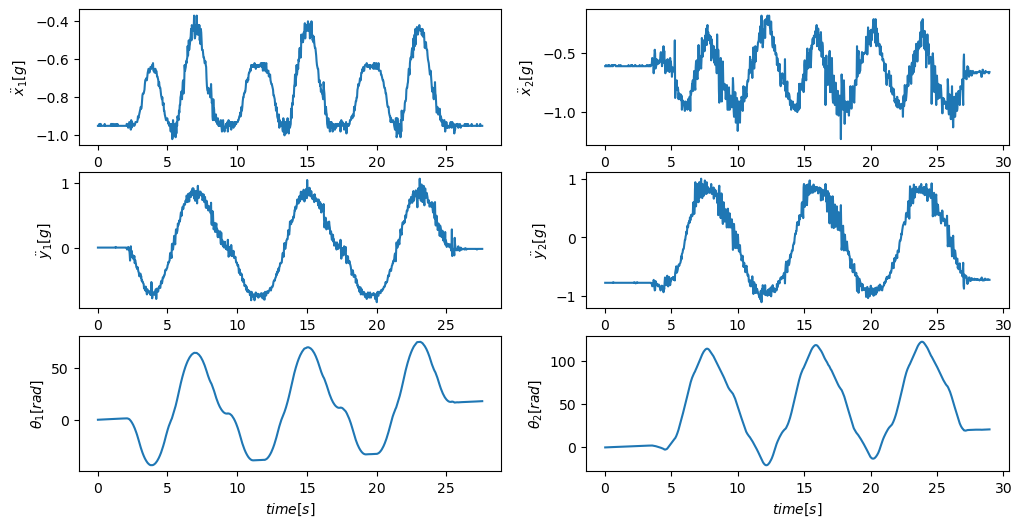

In [236]:
data1 = np.loadtxt("Time_AccX_AccY_yaw_theta1.txt", delimiter=",").T
data2 = np.loadtxt("Time_AccX_AccY_yaw_theta2.txt", delimiter=",").T
data1[0] /= 1e6
data2[0] /= 1e6


time1, AccX1, AccY1, yaw1 = unpack_data(data1)
time2, AccX2, AccY2, yaw2 = unpack_data(data2)


fig, axs = plt.subplots(3, 2, figsize=(12,6))
for i, data in enumerate([data1, data2]):
    axs[0, i].plot(data[0], data[1])
    axs[0, i].set_xlabel(r"$time [s]$")
    axs[0, i].set_ylabel(f"$\ddot x_{i+1}[g]$")
    axs[1, i].set_xlabel(r"$time [s]$")
    axs[1, i].plot(data[0], data[2])
    axs[1, i].set_ylabel(f"$\ddot y_{i+1}[g]$")
    axs[2, i].plot(data[0], data[3])
    axs[2, i].set_xlabel(r"$time [s]$") 
    axs[2, i].set_ylabel(f"$\\theta_{i+1}[rad]$")

# Accelerometer data

## Finding the orientation of the accelerometers
the first flat part of the acceleration signal represents steady state. At this state we would want the acceleration from gravity to point in the negative y direction.
To accomplish this we find apply a rotation to the x and y acceleration data, such that gravity aligns with the y axis

In [237]:
def orientation(data):
    time = data[0]
    xy = np.array([
        np.average(data[1][np.nonzero(time<2)[0]]),
        np.average(data[2][np.nonzero(time<2)[0]])
        ])
    goal_orient = np.array([
        0,
        -1])  #we want acceleration to point towards negative y

    angle = np.arccos(xy@goal_orient/(np.linalg.norm(xy)*np.linalg.norm(goal_orient)))
    return angle

In [238]:
for data in [data1, data2]:
    angle = orientation(data)
    R = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    data[1:3] = R@data[1:3]

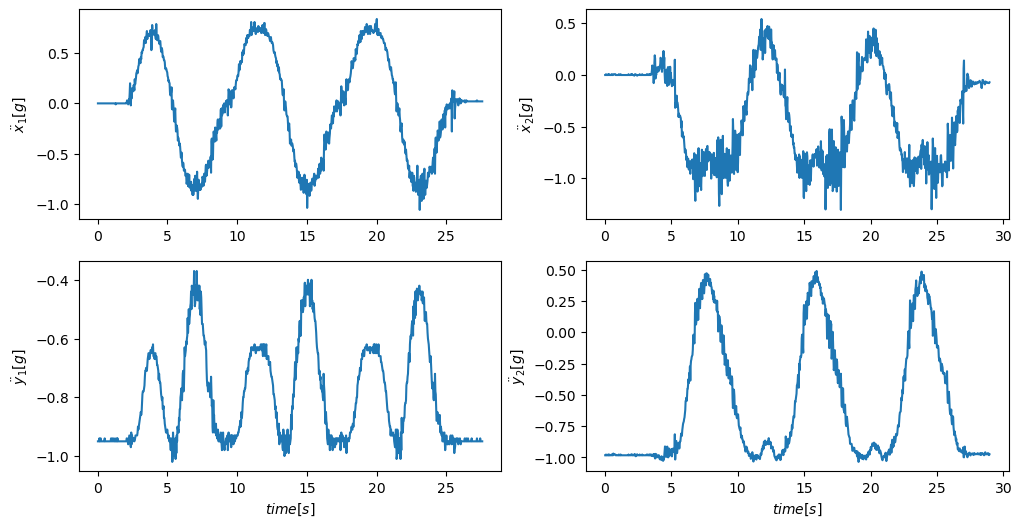

In [239]:
fig, axs = plt.subplots(2, 2, figsize=(12,6))
for i, data in enumerate([data1, data2]):
    axs[0, i].plot(data[0], data[1])
    axs[0, i].set_ylabel(f"$\ddot x_{i+1}[g]$")
    axs[1, i].set_xlabel(r"$time [s]$")
    axs[1, i].plot(data[0], data[2])
    axs[1, i].set_ylabel(f"$\ddot y_{i+1}[g]$")

## Removing bias


the first part of the acceleration signals are in steady state, and so should be zero (if we want to exclude the effect of gravity). we can deduct this bias error from the signal

In [240]:
def remove_y_bias(data):
    bias = np.average(data[2][np.nonzero(data[0]<1)[0]])
    data[2] -= bias

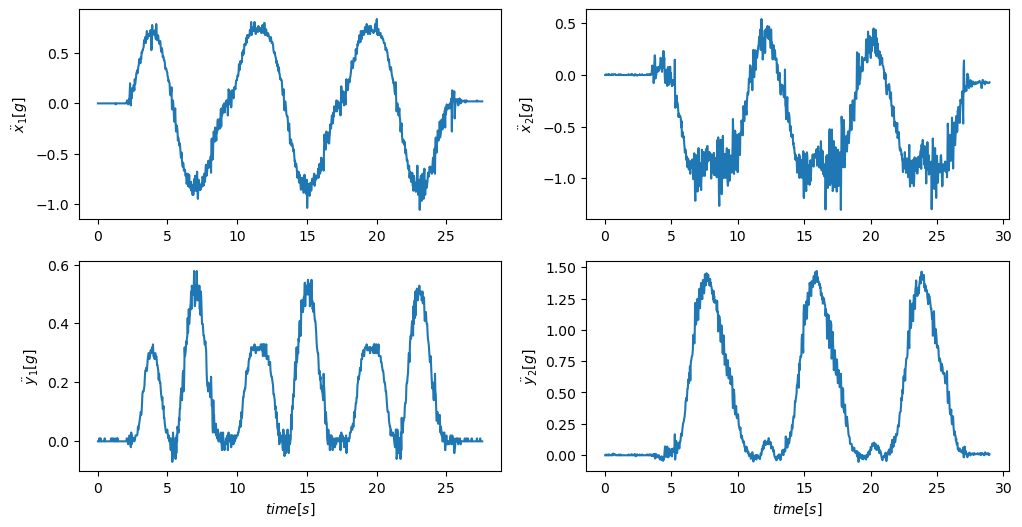

In [241]:
for data in [data1, data2]:
    remove_y_bias(data)

fig, axs = plt.subplots(2, 2, figsize=(12,6))
for i, data in enumerate([data1, data2]):
    axs[0, i].plot(data[0], data[1])
    axs[0, i].set_ylabel(f"$\ddot x_{i+1}[g]$")
    axs[1, i].set_xlabel(r"$time [s]$")
    axs[1, i].plot(data[0], data[2])
    axs[1, i].set_ylabel(f"$\ddot y_{i+1}[g]$")

## Removing high frequency noise
by applying a butterworth lowpass filter, we can remove some of the high frequency noise present in the signal

First we examine the fft of the signal to see where the cutoff frequency should lie

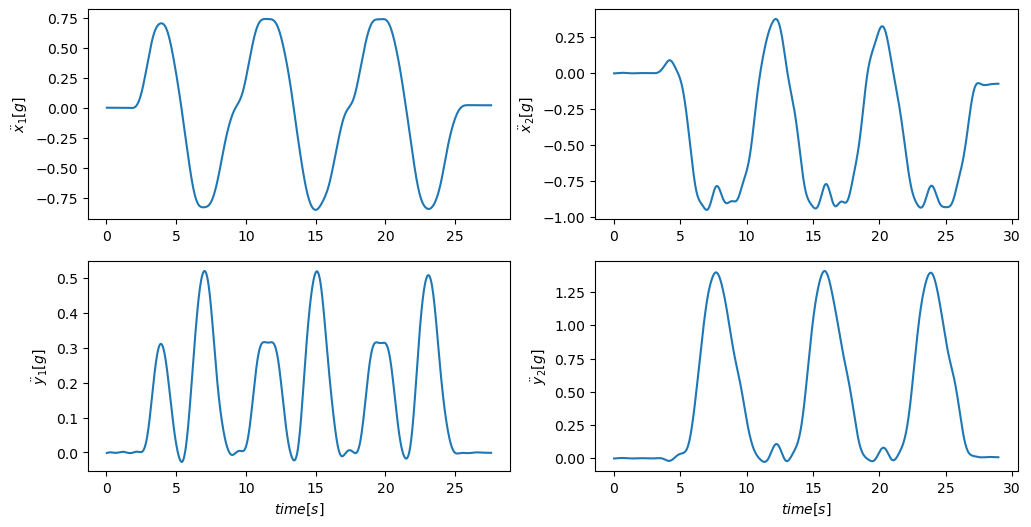

In [242]:
for data in [data1, data2]:
    for i in range(1, 3):
        fs = np.average(np.diff(data[0]))**(-1)  #samping frequency
        a, b = sci.signal.butter(5, 1, fs=fs)
        data[i] = sci.signal.filtfilt(a, b, data[i]) 

fig, axs = plt.subplots(2, 2, figsize=(12,6))
for i, data in enumerate([data1, data2]):
    axs[0, i].plot(data[0], data[1])
    axs[0, i].set_ylabel(f"$\ddot x_{i+1}[g]$")
    axs[1, i].set_xlabel(r"$time [s]$")
    axs[1, i].plot(data[0], data[2])
    axs[1, i].set_ylabel(f"$\ddot y_{i+1}[g]$")

# Gyro data

## Removing drift

Gyroscopes have a constant drift that should be removed from the signal. To do so we measure the slope between the periodic peaks of the signal and deduct this proportional function from the signal

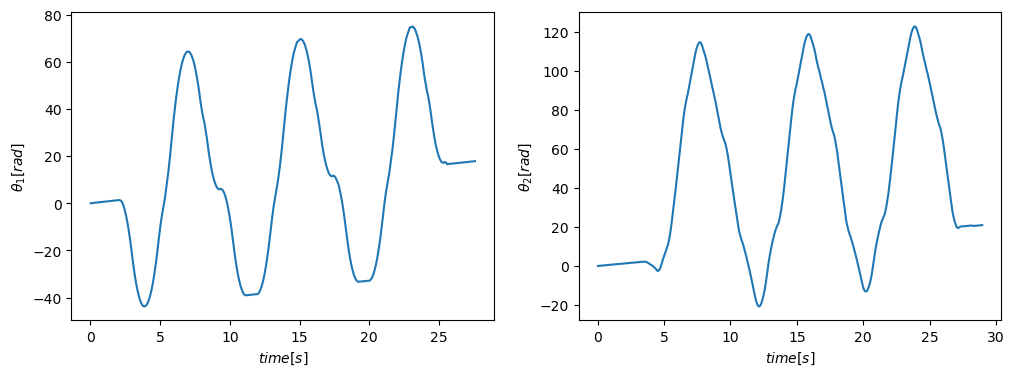

In [243]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].set_xlabel("$time [s]$")
axs[1].set_xlabel("$time [s]$")
axs[0].set_ylabel("$\\theta_1 [rad]$")
axs[1].set_ylabel("$\\theta_2 [rad]$")
for i, data in enumerate([data1, data2]):
    axs[i].plot(data[0], data[-1])

After removing drift:

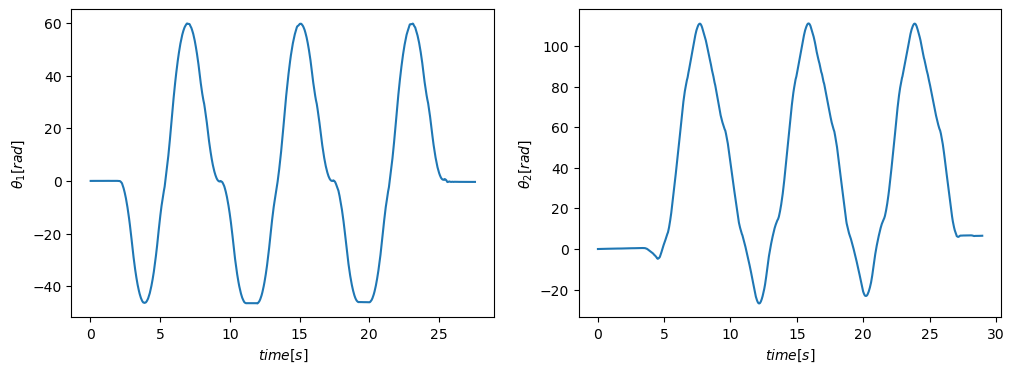

In [244]:
data1[-1] = remove_drift(data1)
data2[-1] = remove_drift(data2)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].set_xlabel("$time [s]$")
axs[1].set_xlabel("$time [s]$")
axs[0].set_ylabel("$\\theta_1 [rad]$")
axs[1].set_ylabel("$\\theta_2 [rad]$")

for i, data in enumerate([data1, data2]):
    axs[i].plot(data[0], data[-1])

## Compensating for the rotation of accelerometer sensor

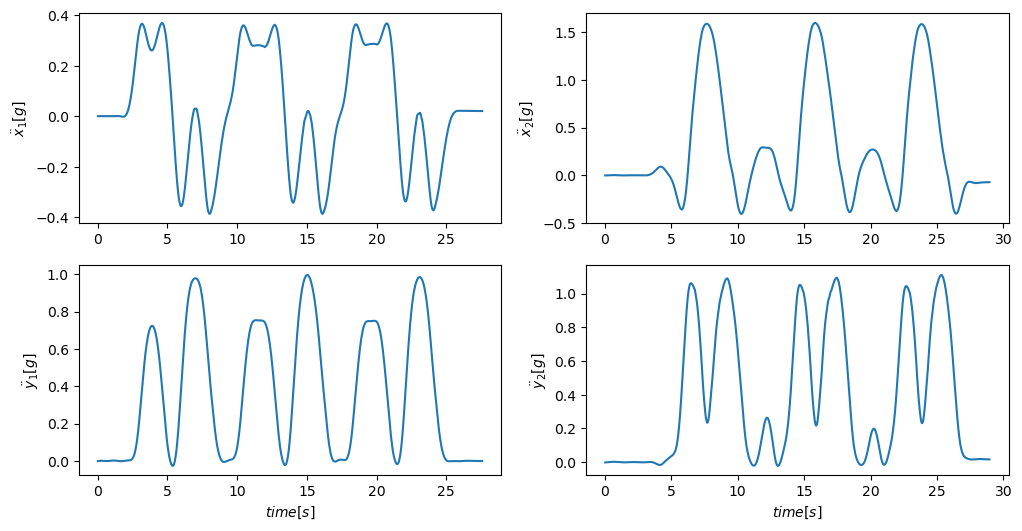

In [245]:
for data in [data1, data2]:
    for i in range(data.shape[1]):
        angle = data[-1,i]/180*np.pi
        R = np.array([
        [np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
        ])
        data[1:3,i] = R@data[1:3,i]

fig, axs = plt.subplots(2, 2, figsize=(12,6))
for i, data in enumerate([data1, data2]):
    axs[0, i].plot(data[0], data[1])
    axs[0, i].set_ylabel(f"$\ddot x_{i+1}[g]$")
    axs[1, i].set_xlabel(r"$time [s]$")
    axs[1, i].plot(data[0], data[2])
    axs[1, i].set_ylabel(f"$\ddot y_{i+1}[g]$")